In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, ClusterCentroids
from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier

from imblearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
import sys

sys.path.append('../../')
from RF_atomver import *

In [27]:
max_cols = ['accuracy', 'precision', 'recall', 'specificity',
       'TN',  'TP', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1']
min_cols = ['FN', 'FP']
# max_rows = test_df.groupby('model')[max_cols].max()
metric_cols = ['accuracy', 'precision', 'recall', 'specificity',
             'ROC-AUC', 'MCC', 'Balanced Accuracy','f1','cm', 'NEK', 'model', 'feat_type', 'strategy']

In [28]:
# GP Model
result_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/GP/GP_results/'
data_dir = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/'
nek_nums = [2,3,5,9]
samplings = ['scaled', 'UNDER', 'SMOTE', 'ADASYN'] 
features = ['moe', 'mfp']
NEK= 'NEK'

train_results = [] 
test_results = [] 
train_model_names= []
test_model_names=[]
for i, n in enumerate(nek_nums):
    nek = str(n)
    # print(f'NEK{nek}')
    nek_path= f'{data_dir}NEK{nek}/bind/'
    for k, feat in enumerate(features): 
        print()
        for j, samp in enumerate(samplings): 
        
            print(f'NEK{nek} bind {feat} {samp}')
            file_root = f'NEK{nek}_binding_{feat}_{samp}'
       
            train = pd.read_csv(result_path+file_root+'_train_GP.csv') 
            test = pd.read_csv(result_path+file_root+'_test_GP.csv') 
            # df.iloc[[0]]
            train_model_names.append(train['model'].iloc[0])
            test_model_names.append(test['model'].iloc[0])
            train_results.append(train.iloc[[0]][metric_cols].values.flatten())
            test_results.append(test.iloc[[0]][metric_cols].values.flatten())
            
        
            # print()
            
            
    # print()
    
    if n == 2 or n == 9:

        nek_path= f'{data_dir}NEK{nek}/inhib/'
        for k, feat in enumerate(features): 
            print()
            for j, samp in enumerate(samplings): 
                file_root = f'NEK{nek}_inhibition_{feat}_{samp}'
                print(f'NEK{nek} inbhib {feat} {samp}')
                train = pd.read_csv(result_path+file_root+'_train_GP.csv') 
                test = pd.read_csv(result_path+file_root+'_test_GP.csv') 
                train_model_names.append(train['model'].iloc[0])
                test_model_names.append(test['model'].iloc[0])
                train_results.append(train.iloc[[0]][metric_cols].values.flatten())
                test_results.append(test.iloc[[0]][metric_cols].values.flatten())
       
            
    print()


NEK2 bind moe scaled
NEK2 bind moe UNDER
NEK2 bind moe SMOTE
NEK2 bind moe ADASYN

NEK2 bind mfp scaled
NEK2 bind mfp UNDER
NEK2 bind mfp SMOTE
NEK2 bind mfp ADASYN

NEK2 inbhib moe scaled
NEK2 inbhib moe UNDER
NEK2 inbhib moe SMOTE
NEK2 inbhib moe ADASYN

NEK2 inbhib mfp scaled
NEK2 inbhib mfp UNDER
NEK2 inbhib mfp SMOTE
NEK2 inbhib mfp ADASYN


NEK3 bind moe scaled
NEK3 bind moe UNDER
NEK3 bind moe SMOTE
NEK3 bind moe ADASYN

NEK3 bind mfp scaled
NEK3 bind mfp UNDER
NEK3 bind mfp SMOTE
NEK3 bind mfp ADASYN


NEK5 bind moe scaled
NEK5 bind moe UNDER
NEK5 bind moe SMOTE
NEK5 bind moe ADASYN

NEK5 bind mfp scaled
NEK5 bind mfp UNDER
NEK5 bind mfp SMOTE
NEK5 bind mfp ADASYN


NEK9 bind moe scaled
NEK9 bind moe UNDER
NEK9 bind moe SMOTE
NEK9 bind moe ADASYN

NEK9 bind mfp scaled
NEK9 bind mfp UNDER
NEK9 bind mfp SMOTE
NEK9 bind mfp ADASYN

NEK9 inbhib moe scaled
NEK9 inbhib moe UNDER
NEK9 inbhib moe SMOTE
NEK9 inbhib moe ADASYN

NEK9 inbhib mfp scaled
NEK9 inbhib mfp UNDER
NEK9 inbhib mf

In [49]:

train_df = pd.DataFrame(train_results, columns=metric_cols)
test_df = pd.DataFrame(test_results, columns=metric_cols)
test_df =  pd.DataFrame(test_results,columns=metric_cols)
test_df['dataset_category'] = test_df['feat_type'].astype(str)+'_'+test_df['strategy']
# train_df['model'] = train_model_names
# test_df['model'] = test_model_names
# train_df['NEK'] = train_df['model'].str[0:4]+'_'+train_df['model'].str.extract(r'_(.*?)_', expand=False)
# test_df['NEK'] = test_df['model'].str[0:4]+'_'+test_df['model'].str.extract(r'_(.*?)_', expand=False)
# train_df['strategy'] = train_df['model'].str[-10:-1].str.extract(r'_(.*?)_', expand=False)
# test_df['strategy'] = test_df['model'].str[-10:-1].str.extract(r'_(.*?)_', expand=False)
# train_df['feat_type'] = train_df['model'].str[-15:-1].str.extract(r'_(.*?)_', expand=False)
# test_df['feat_type'] = test_df['model'].str[-15:-1].str.extract(r'_(.*?)_', expand=False)


# add ratio of active
don't have to do this for now


In [34]:
data_dir = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/'
test_active_ratio = [] 
test0count = [] 
test1count = []
count = 0
train_active_ratio = []
for n in nek_list:
    for i, feat in enumerate(feat_types): 
        for j, samp in enumerate(samplings): 
            count+=1
    
            data_path = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/bind/'
            df_name = f'NEK{n}_binding_{feat}_{samp}_df.csv'
            # elif i == 'inhibition':
            #     data_path = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/inhib/'
            
            df = pd.read_csv(data_path+df_name)
            print(f'{count}. {df_name}')
            test = df[df['subset'] == 'test']['active'].value_counts()
            train = df[df['subset'] == 'train']['active'].value_counts()
            test0 = test[0]
            test1 = test[1] 
            total=test0+test1
            ratio_active = test1/total
            test_active_ratio.append(ratio_active) 
            test0count.append(test0)
            test1count.append(test1)
            train_ratio = train[1]/train[0]+train[1]
            train_active_ratio.append(train_ratio)
            # print()

          
            if n == '2' or n == '9':
                data_path = f'/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/NEK{n}/inhib/'
                df_name = f'NEK{n}_inhibition_{feat}_{samp}_df.csv'

                df = pd.read_csv(data_path+df_name)
                count+=1
                print(f'{count}. {df_name}')
                test = df[df['subset'] == 'test']['active'].value_counts()
                train = df[df['subset'] == 'train']['active'].value_counts()
                test0 = test[0]
                test1 = test[1] 
                total=test0+test1
                ratio_active = test1/total
                test_active_ratio.append(ratio_active) 
                test0count.append(test0)
                test1count.append(test1)
                train_ratio = train[1]/train[0]+train[1]
                train_active_ratio.append(train_ratio)
                # print()
active_data = {'inactive': test0count, 'active':test1count, 'percent_active': test_active_ratio}
# test_df['inactive'] = test0count
# test_df['active'] = test1count
# test_df['percent_active']=test_active_ratio
# test_df['train_percent_active'] = train_active_ratio



1. NEK2_binding_moe_scaled_df.csv
2. NEK2_inhibition_moe_scaled_df.csv
3. NEK2_binding_moe_UNDER_df.csv
4. NEK2_inhibition_moe_UNDER_df.csv
5. NEK2_binding_moe_SMOTE_df.csv
6. NEK2_inhibition_moe_SMOTE_df.csv
7. NEK2_binding_moe_ADASYN_df.csv
8. NEK2_inhibition_moe_ADASYN_df.csv
9. NEK2_binding_mfp_scaled_df.csv
10. NEK2_inhibition_mfp_scaled_df.csv
11. NEK2_binding_mfp_UNDER_df.csv
12. NEK2_inhibition_mfp_UNDER_df.csv
13. NEK2_binding_mfp_SMOTE_df.csv
14. NEK2_inhibition_mfp_SMOTE_df.csv
15. NEK2_binding_mfp_ADASYN_df.csv
16. NEK2_inhibition_mfp_ADASYN_df.csv
17. NEK3_binding_moe_scaled_df.csv
18. NEK3_binding_moe_UNDER_df.csv
19. NEK3_binding_moe_SMOTE_df.csv
20. NEK3_binding_moe_ADASYN_df.csv
21. NEK3_binding_mfp_scaled_df.csv
22. NEK3_binding_mfp_UNDER_df.csv
23. NEK3_binding_mfp_SMOTE_df.csv
24. NEK3_binding_mfp_ADASYN_df.csv
25. NEK5_binding_moe_scaled_df.csv
26. NEK5_binding_moe_UNDER_df.csv
27. NEK5_binding_moe_SMOTE_df.csv
28. NEK5_binding_moe_ADASYN_df.csv
29. NEK5_binding_mf

# Display metrics with sampling strategy on x 

NEK2_binding


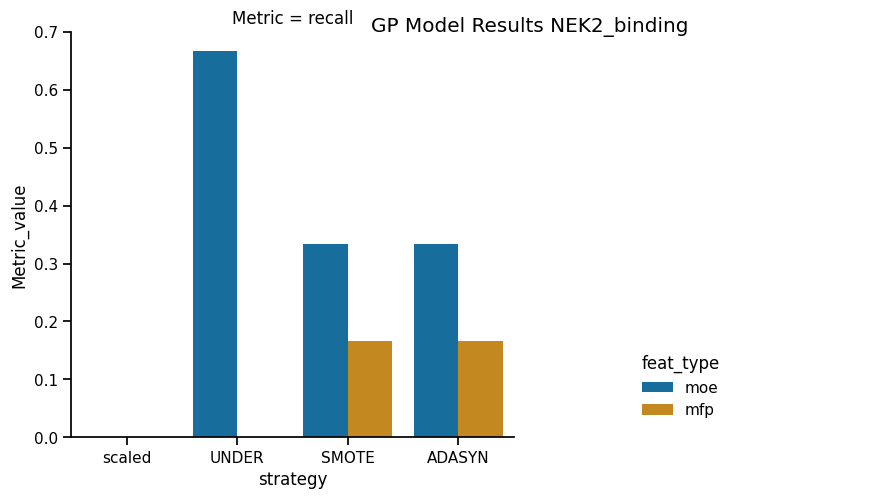


NEK2_inhibition


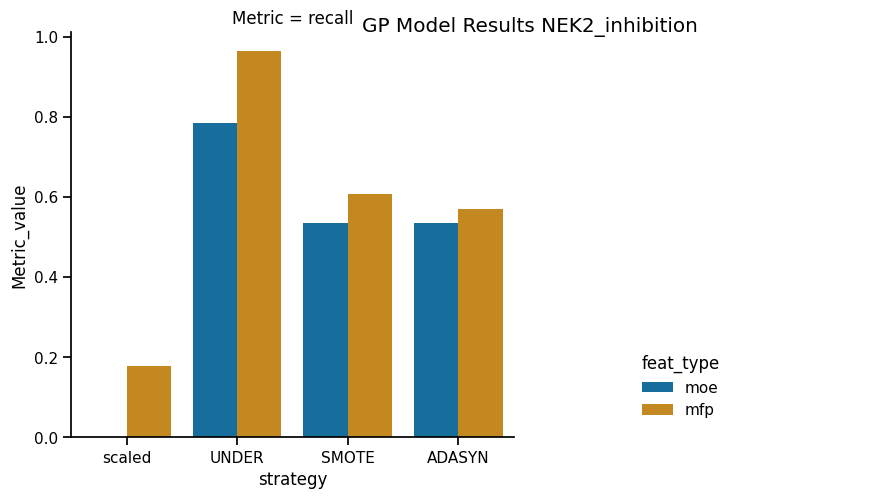


NEK3_binding


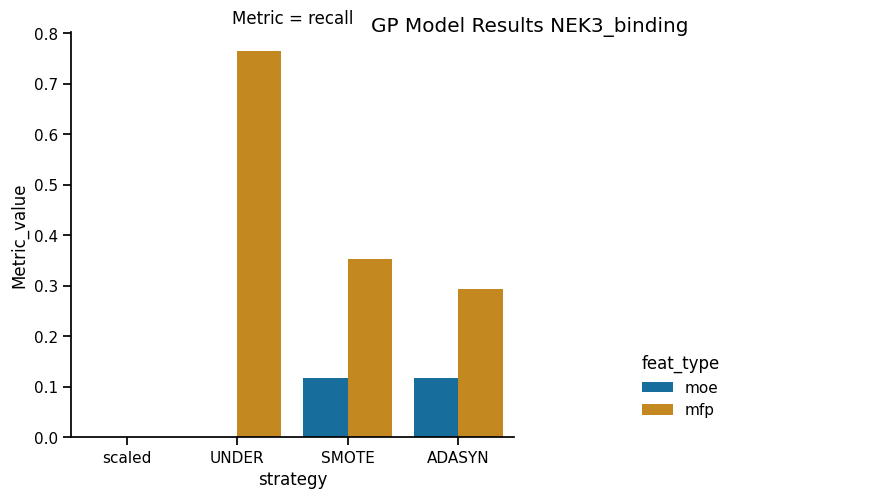


NEK5_binding


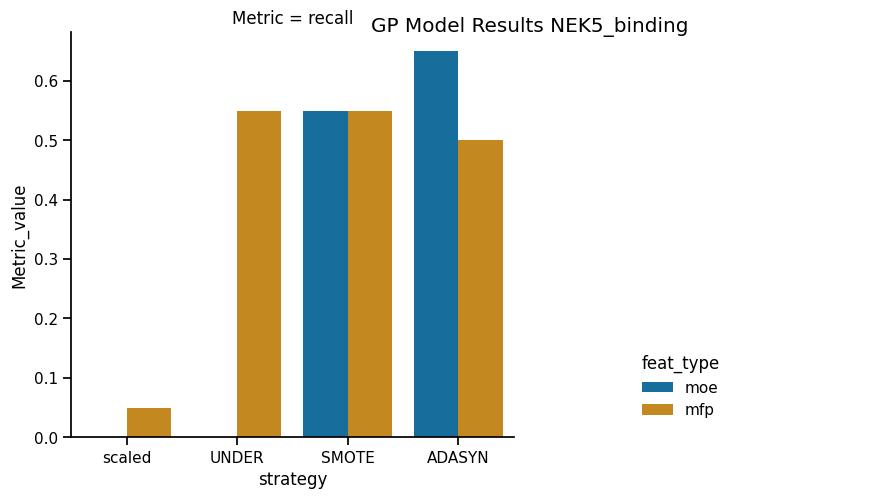


NEK9_binding


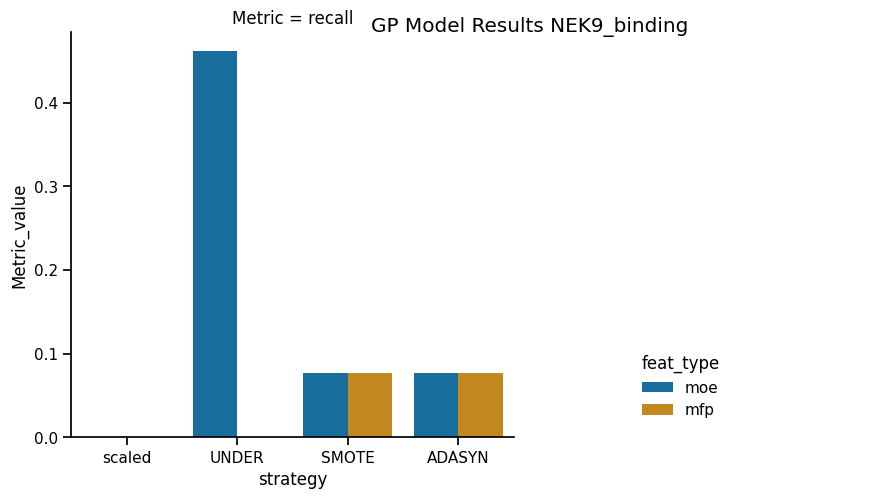


NEK9_inhibition


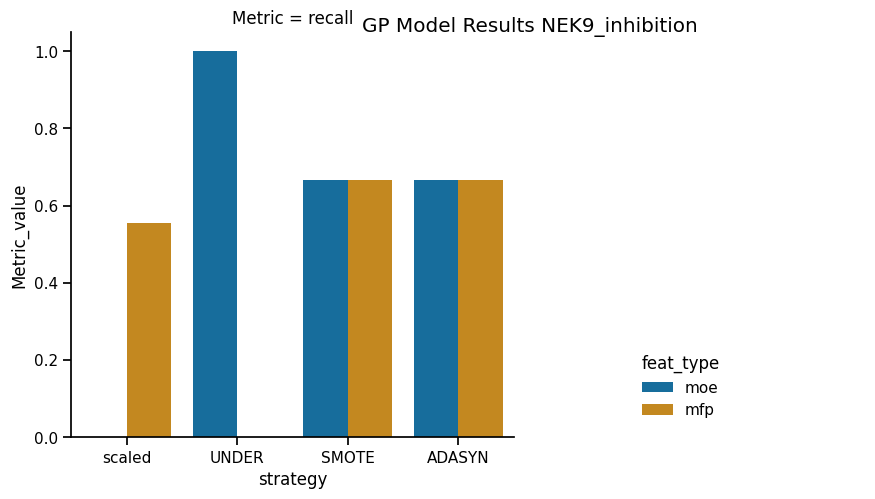

In [50]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
# value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1']
value_vars=['recall']
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    print(nek) 
    dflong=nek_df.melt(id_vars=['strategy', 'feat_type', 'model','cm'], value_vars=['recall'],
           var_name='Metric', value_name='Metric_value')
    dflong=dflong.sort_values('Metric')
    # print(dflong['cm'])
    # display(dflong)
    sns.set_context('notebook')
    sns.set_palette('colorblind')
    # grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=3, s=70, jitter=0.2)
    grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=2)
    # kwargs={'loc':(0.79, 0.15)}
    sns.move_legend(grid, (0.725, 0.15))
    grid.fig.subplots_adjust(top=0.95)
    
    grid.fig.suptitle(f'GP Model Results {nek}');
    plt.savefig(f"figures/GP_{nek}_metrics_catplot_xsamp.png")
    
    plt.show();
    
    print()
    # grid.savefig('NEK2_GP_bind.png')

    # for i, metric in enumerate(max_cols): 
    #     max_metric = new_test.loc[new_test[metric].idxmax()]
    #     max_model_name = max_metric['model'] 
    #     print(f'{metric}:')
    #     # display(max_metric)
    #     print()
    # print()
    # print('\nLowest FN and FP\n')
    # for j, metric in enumerate(min_cols): 
    #     min_metric = new_test.loc[new_test[metric].idxmax()]
    #     print(f'{metric}:')
    #     display(min_metric)

    #     print()


# Display metrics with feat type on x 

NEK2_binding


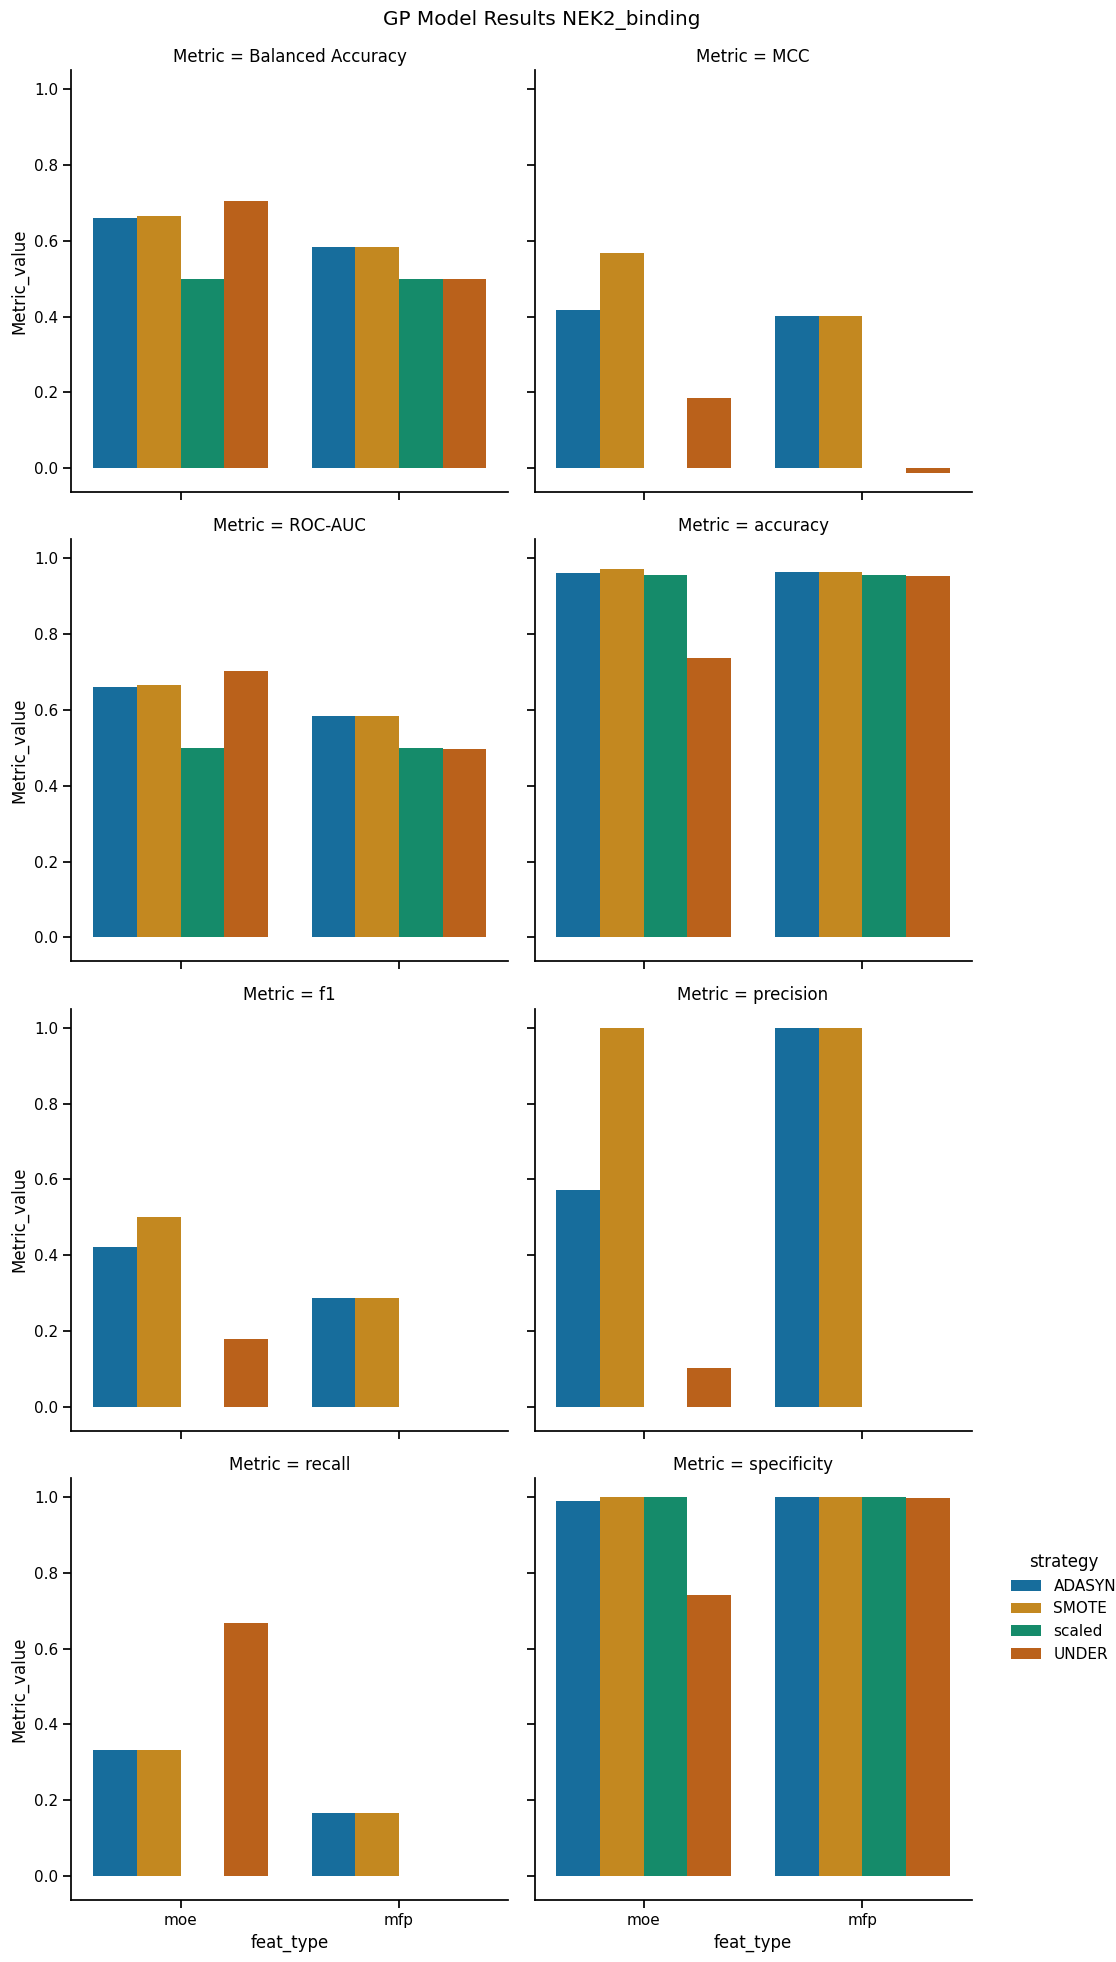


NEK2_inhibition


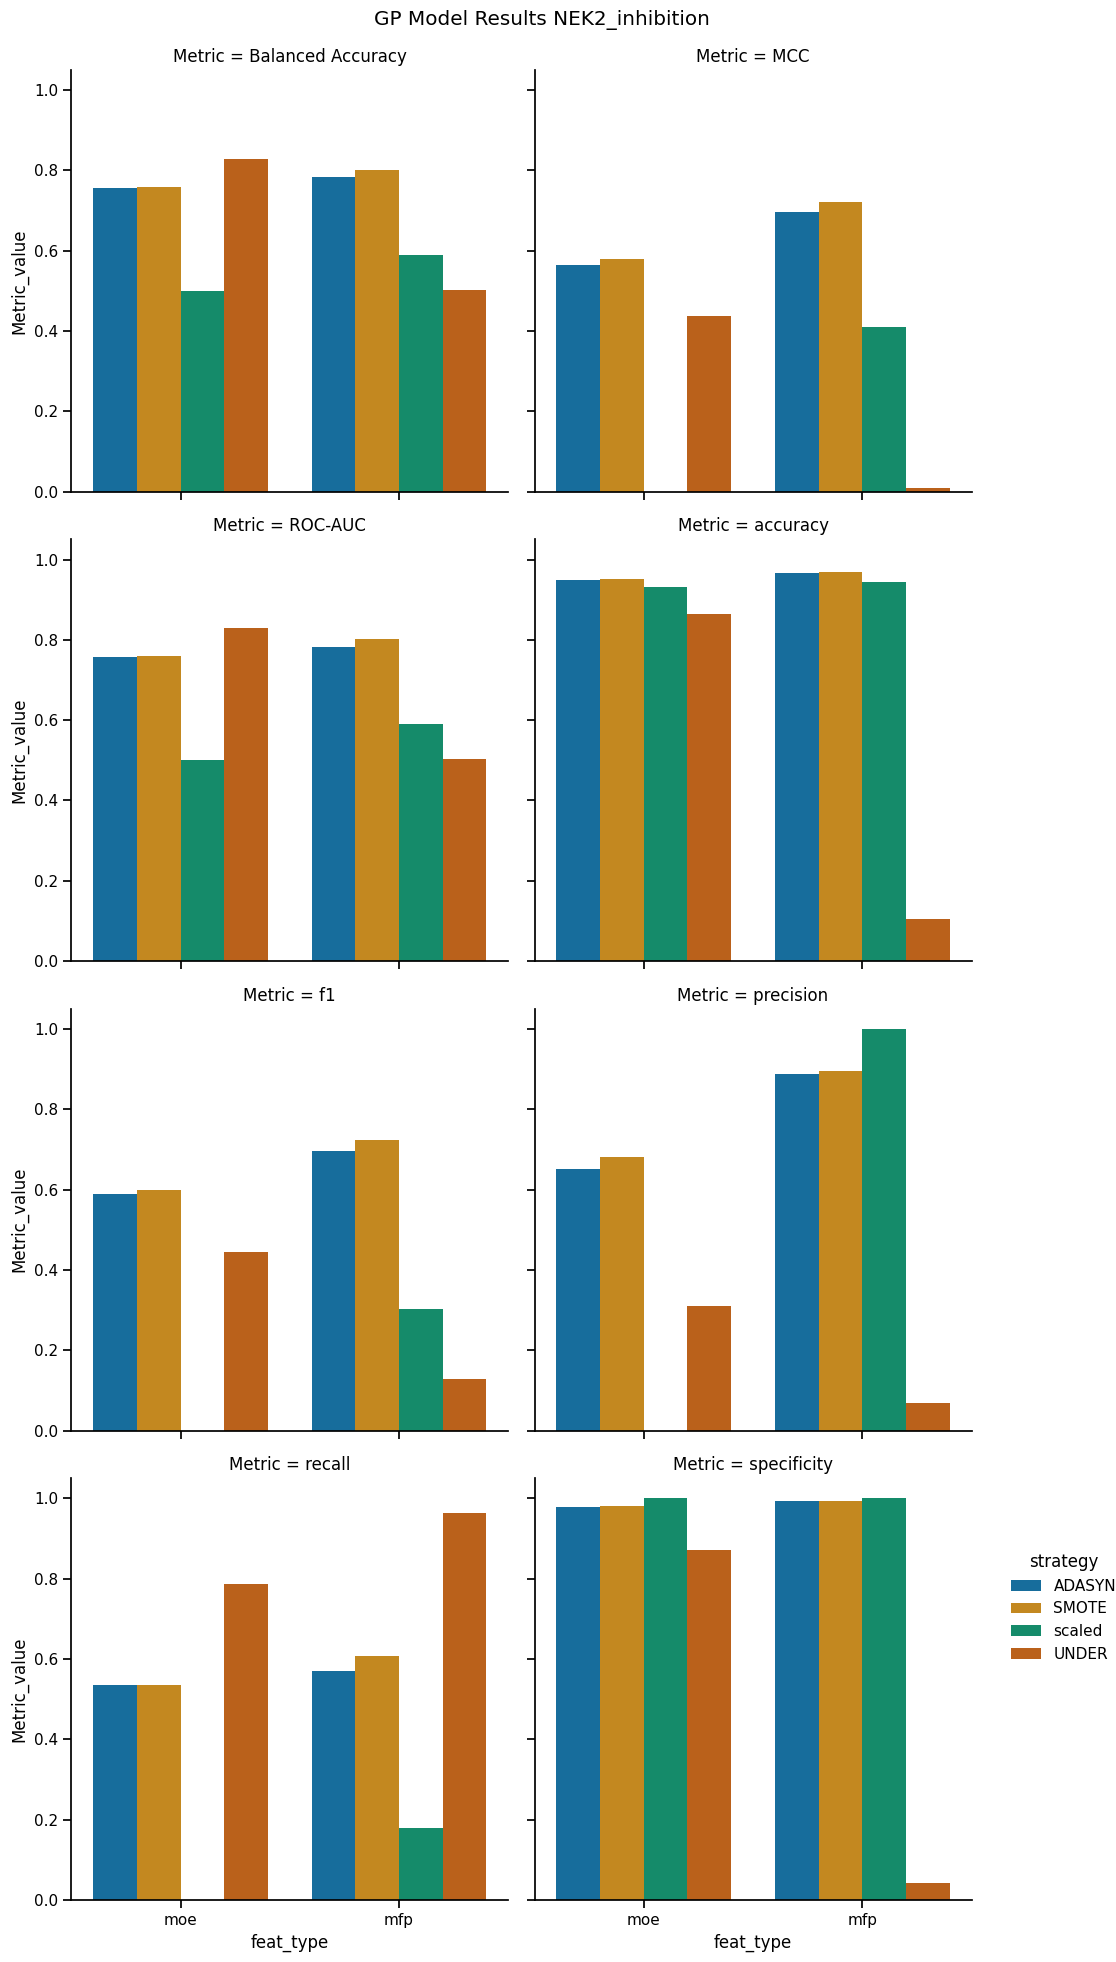


NEK3_binding


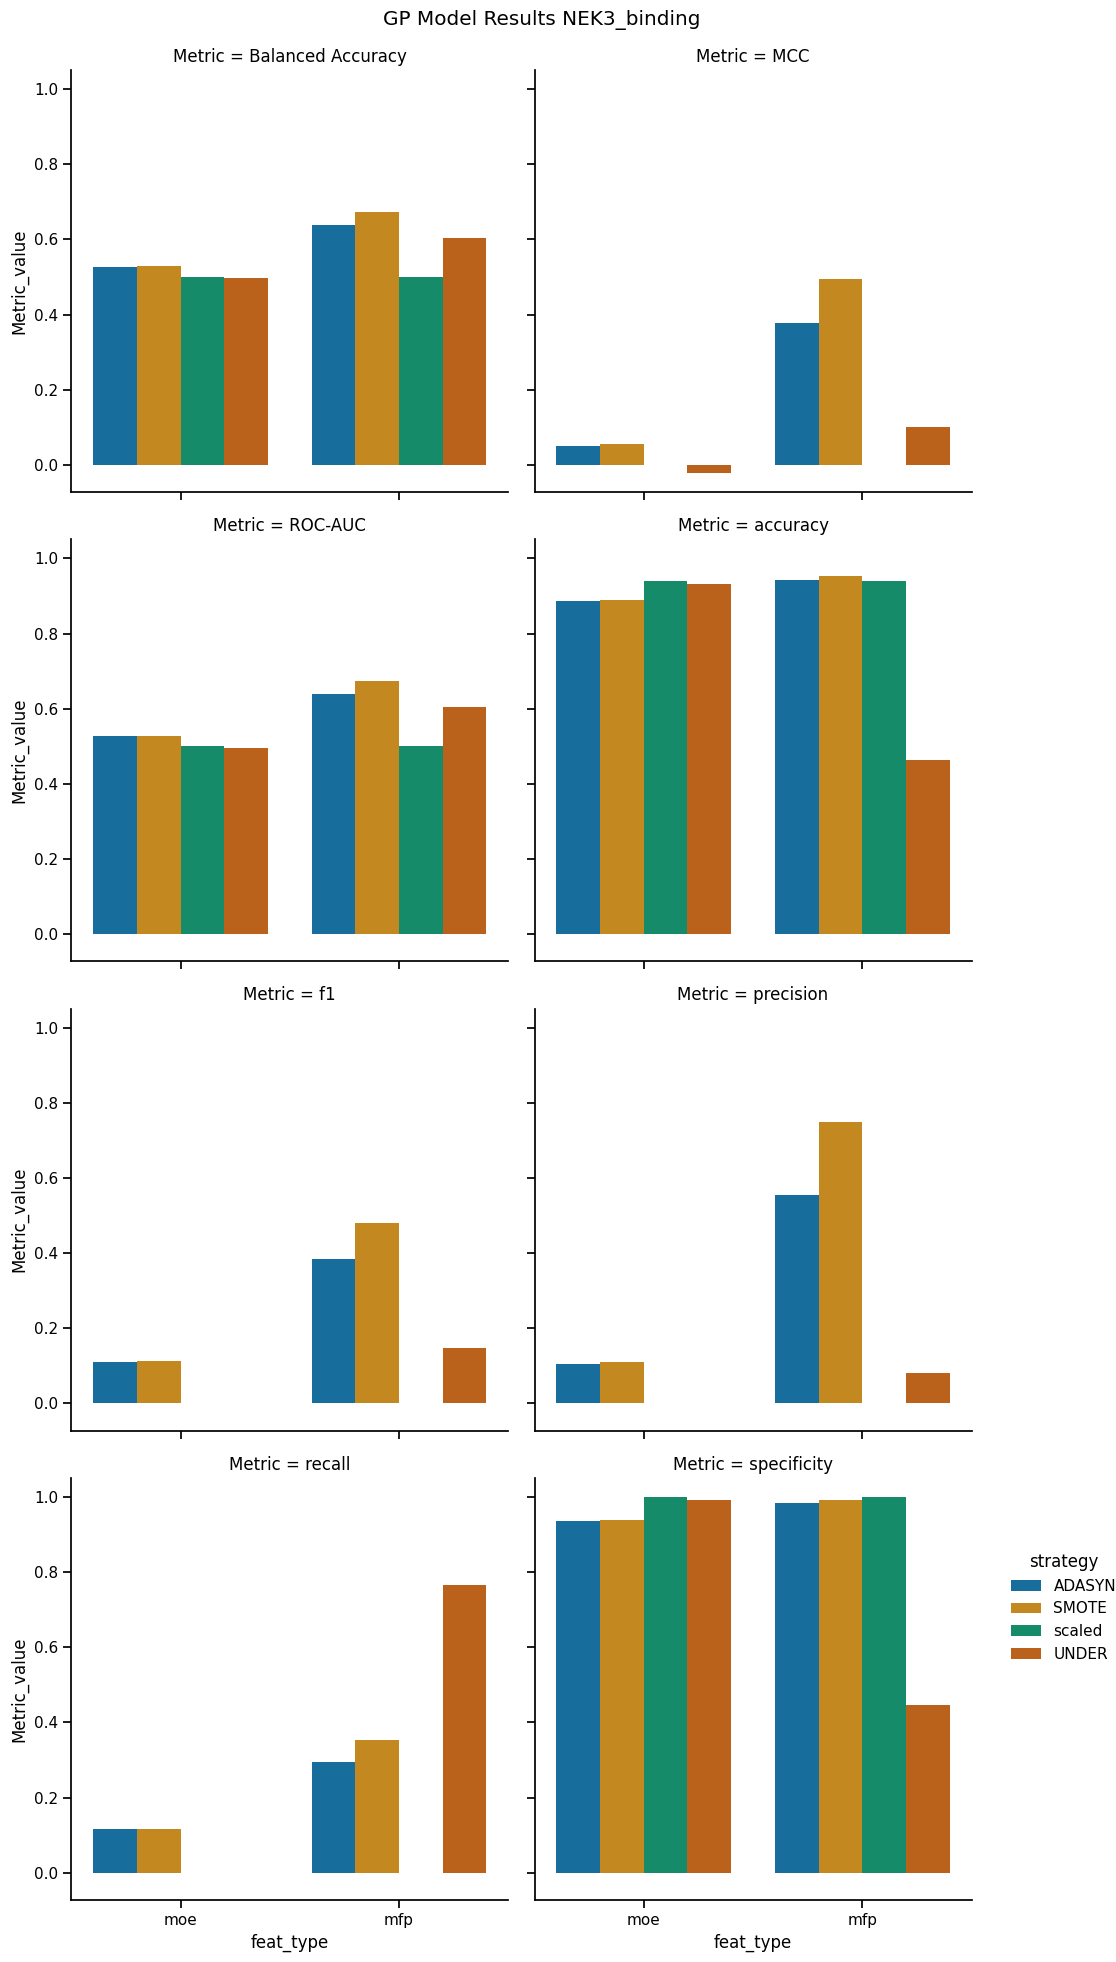


NEK5_binding


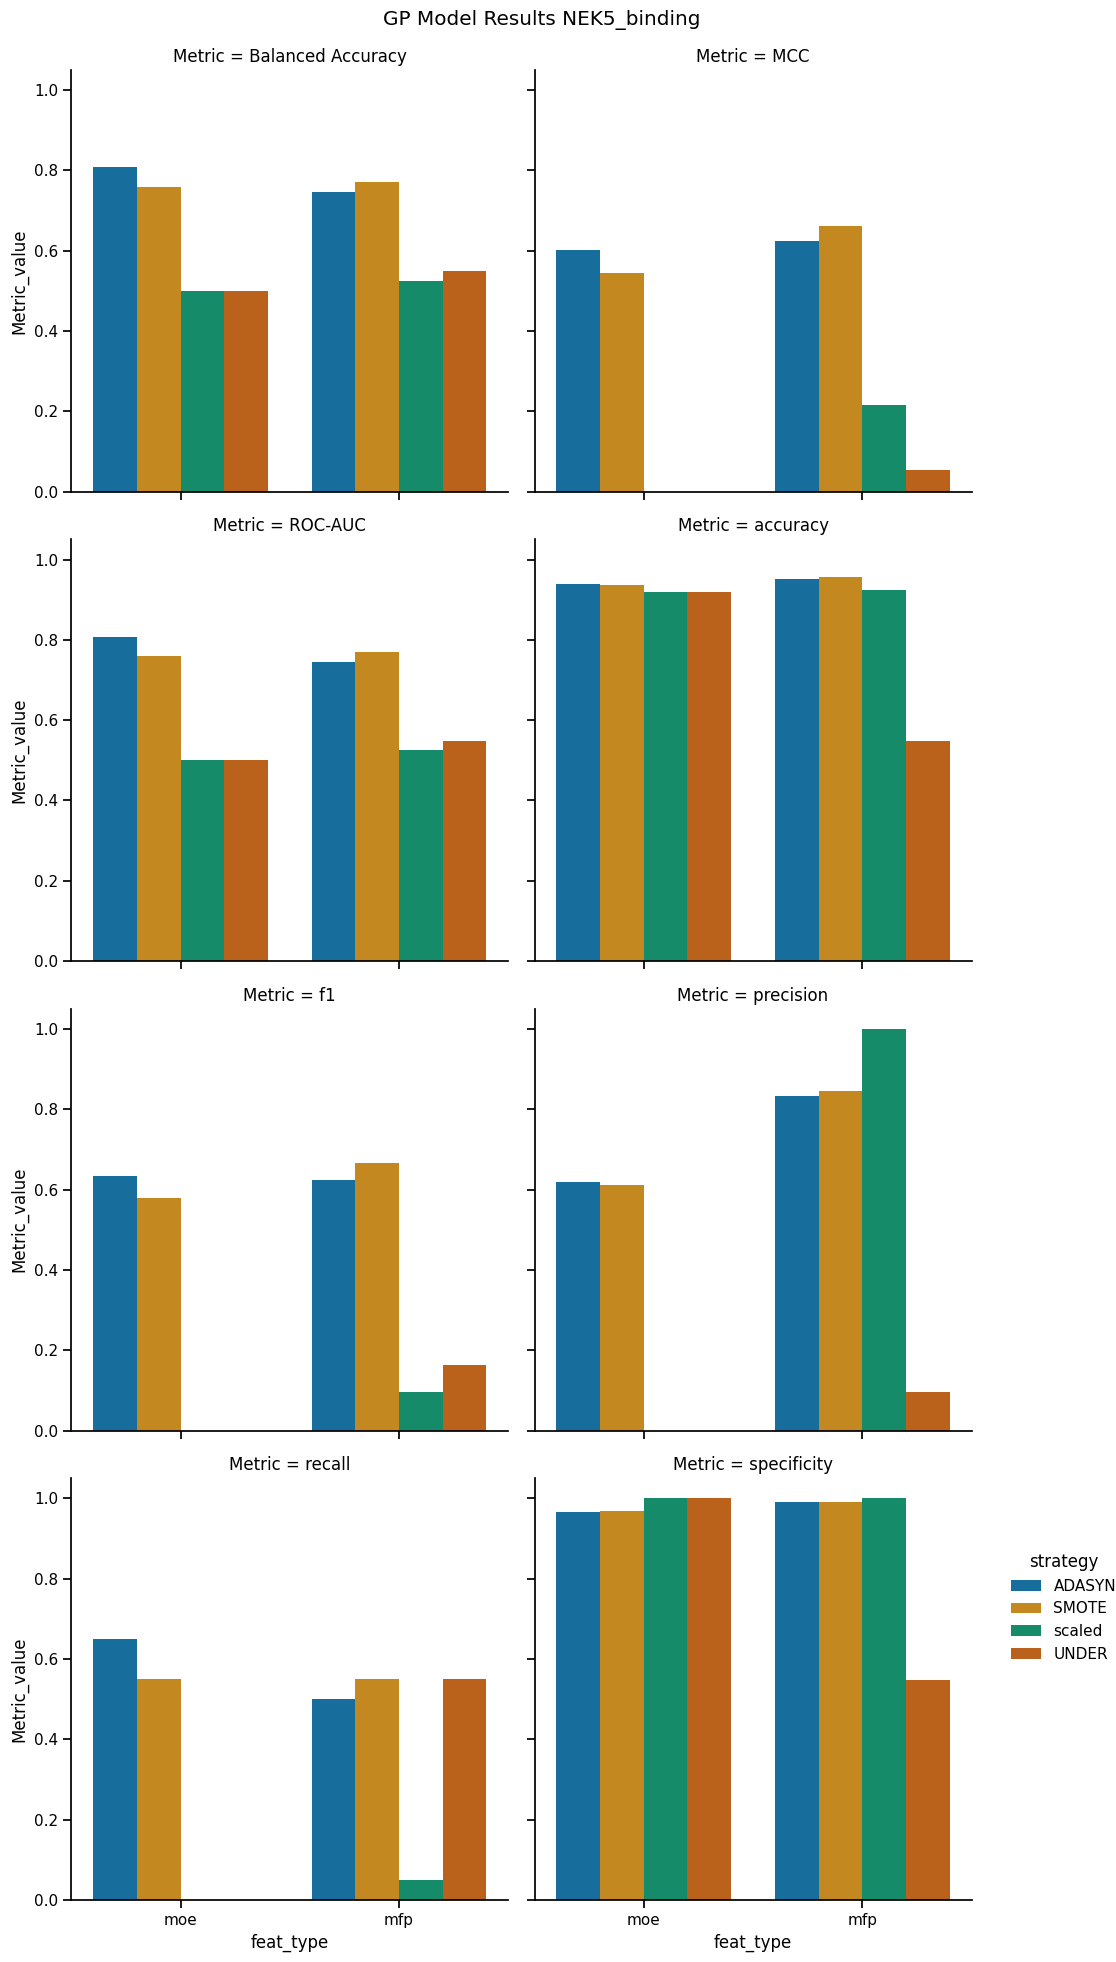


NEK9_binding


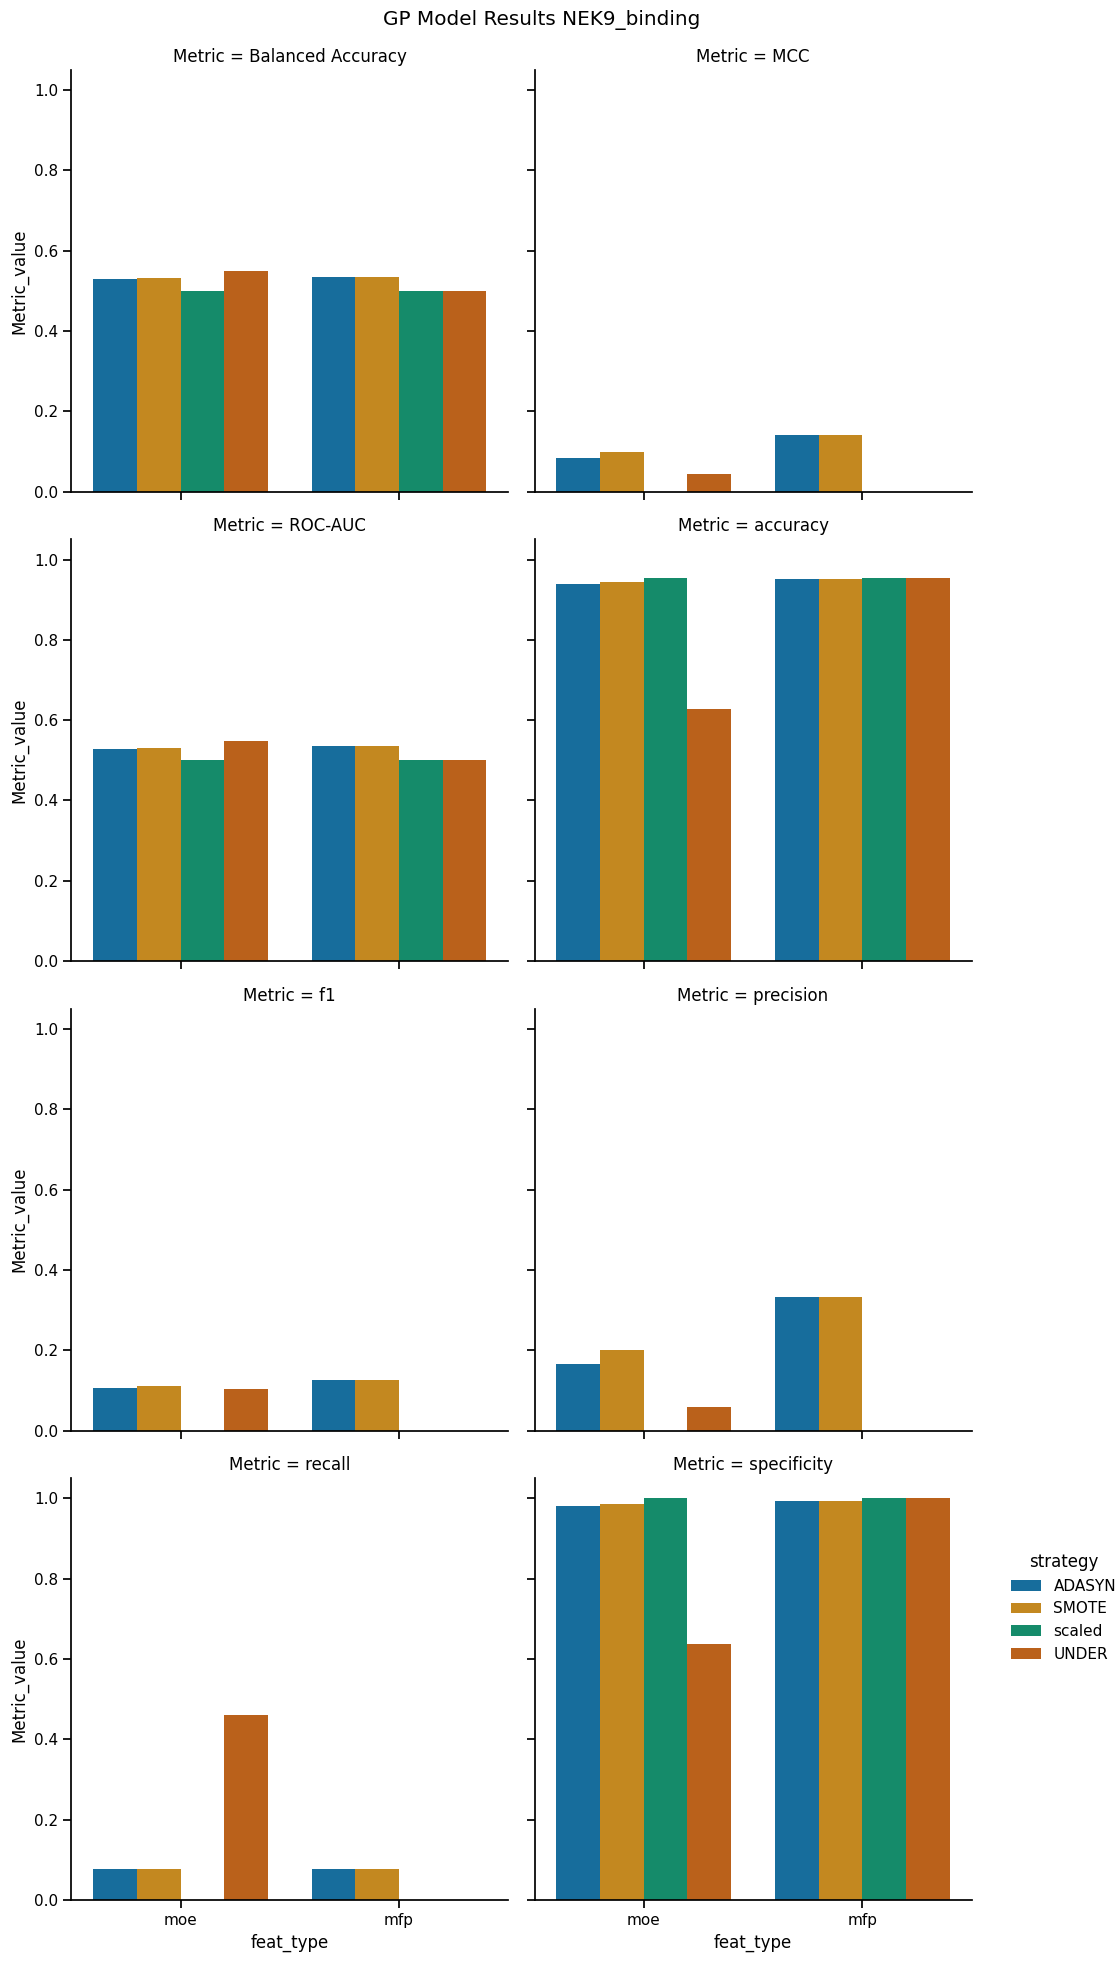


NEK9_inhibition


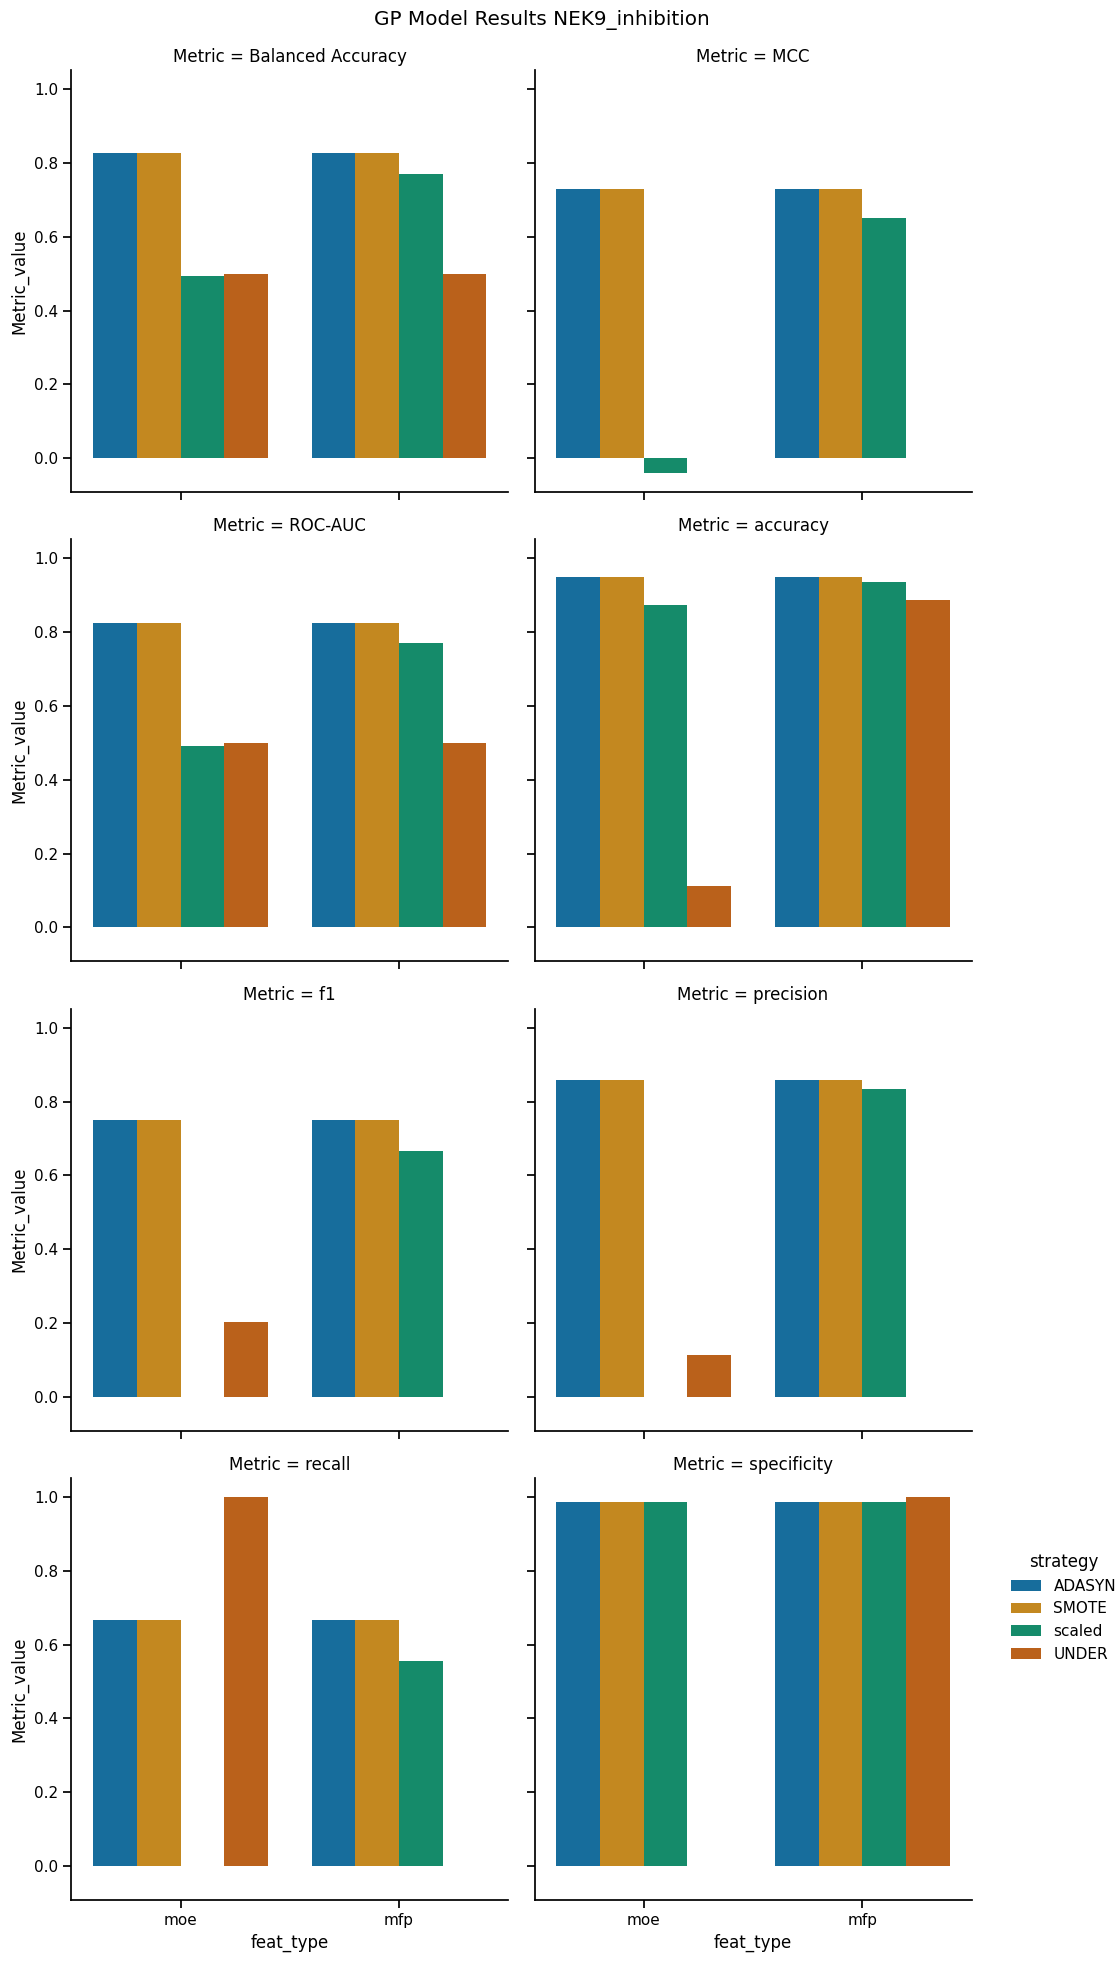

In [51]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    print(nek)
    dflong=nek_df.melt(id_vars=['strategy', 'feat_type','model','cm'], value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1'],
           var_name='Metric', value_name='Metric_value')
    dflong=dflong.sort_values('Metric')
    sns.set_context('notebook')
    sns.set_palette('colorblind')
    # grid=sns.catplot(dflong, x='feat_type', y='Metric_value', hue='strategy', col='Metric', col_wrap=3, s=70, jitter=0.2)
    grid=sns.catplot(dflong, x='feat_type', y='Metric_value', hue='strategy', col='Metric',  kind='bar', col_wrap=2)
    sns.move_legend(grid, (.9, 0.15))
    grid.fig.subplots_adjust(top=0.95)
    
    grid.fig.suptitle(f'GP Model Results {nek}');
    plt.savefig(f"figures/GP_{nek}_metrics_catplot_xfeat.png")
    plt.show();
    print()
    

NEK2_binding


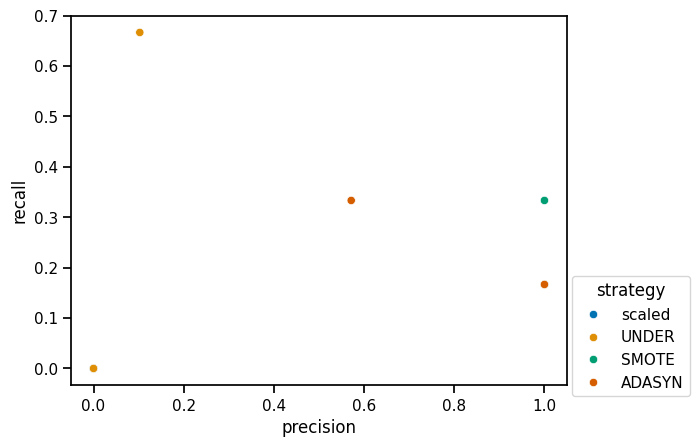


NEK2_inhibition


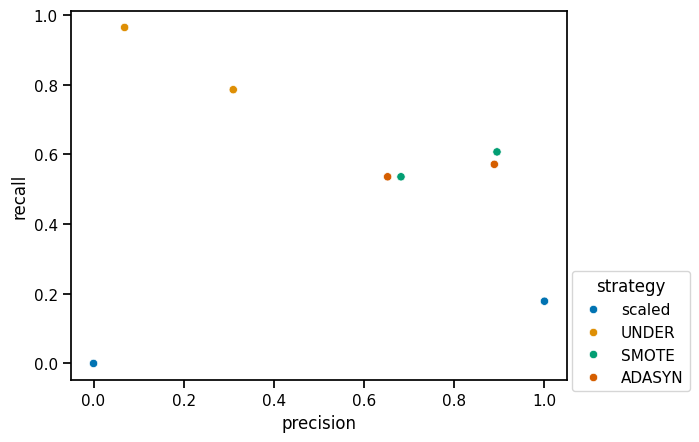


NEK3_binding


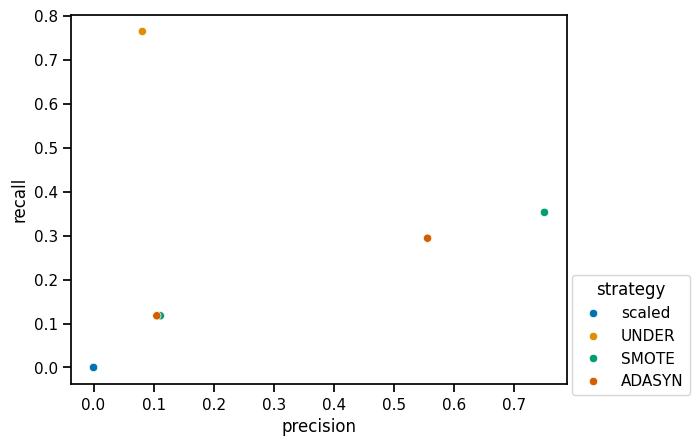


NEK5_binding


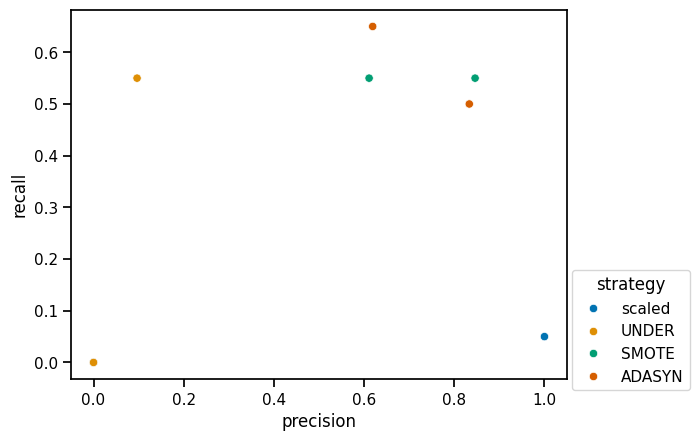


NEK9_binding


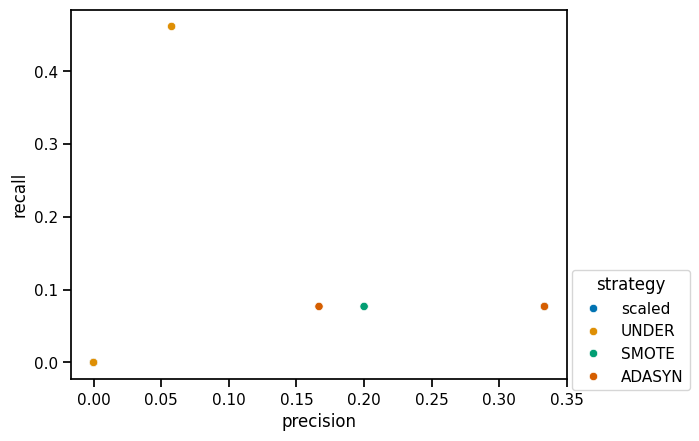


NEK9_inhibition


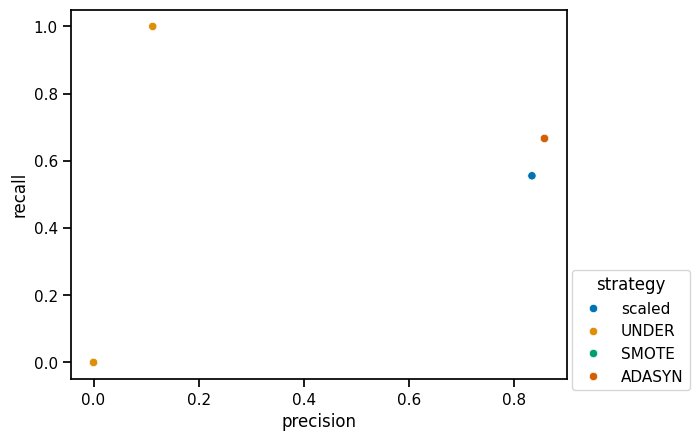

In [52]:
# g=sns.scatterplot(test_df[['strategy', 'precision', 'recall']], x='precision', y='recall', hue='strategy')
# sns.move_legend(g, (1.01, -0.03))
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    print(nek)
    g=sns.scatterplot(nek_df[['strategy', 'precision', 'recall']], x='precision', y='recall', hue='strategy')
    sns.move_legend(g, (1.01, -0.03))
        
    grid.fig.suptitle(f'GP Model Results {nek}');
    plt.show();
    print()
    

# Plot all metrics together 

<Figure size 1200x1000 with 0 Axes>

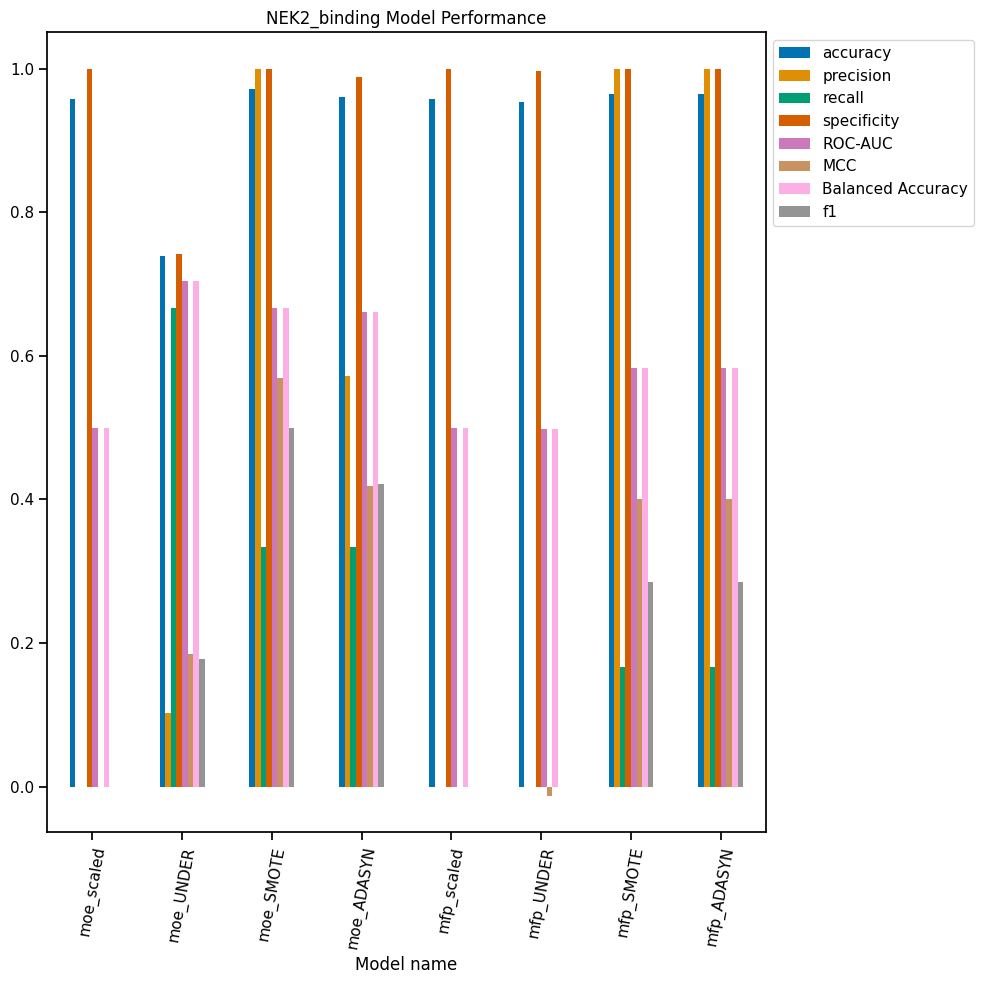

<Figure size 1200x1000 with 0 Axes>

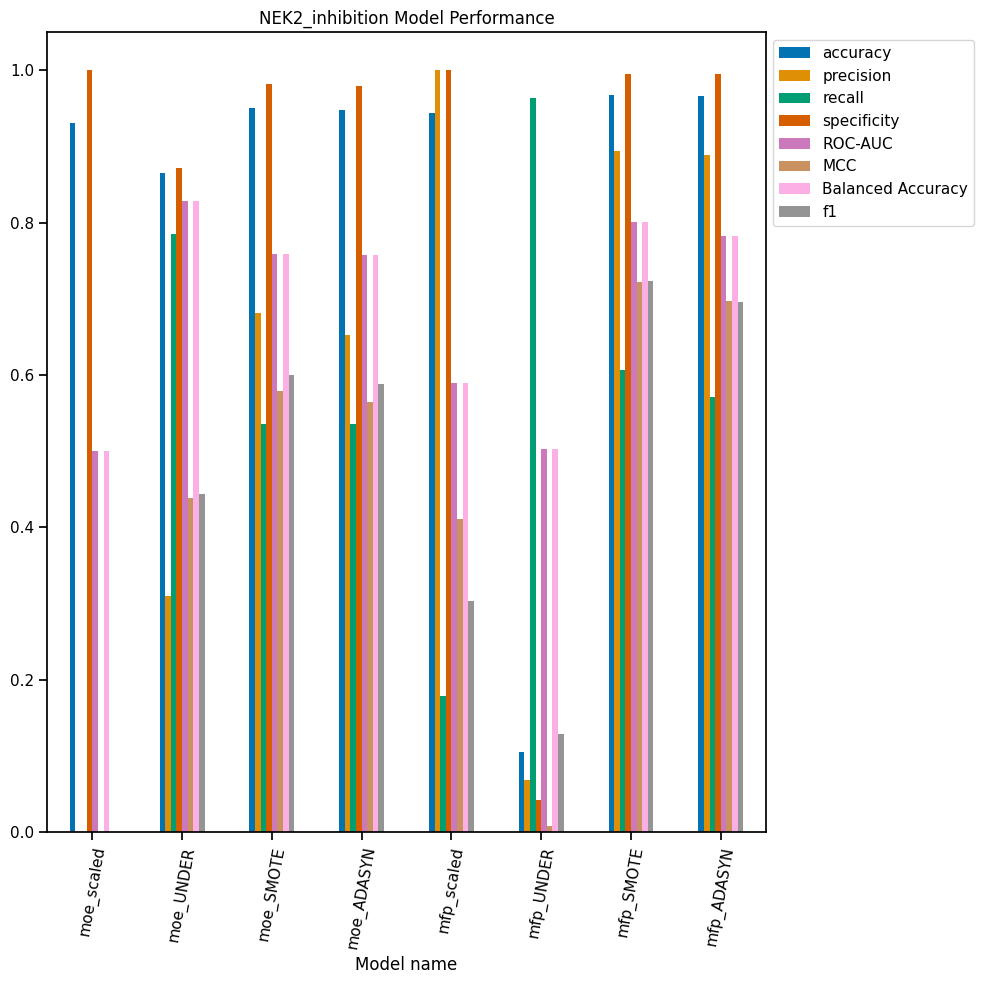

<Figure size 1200x1000 with 0 Axes>

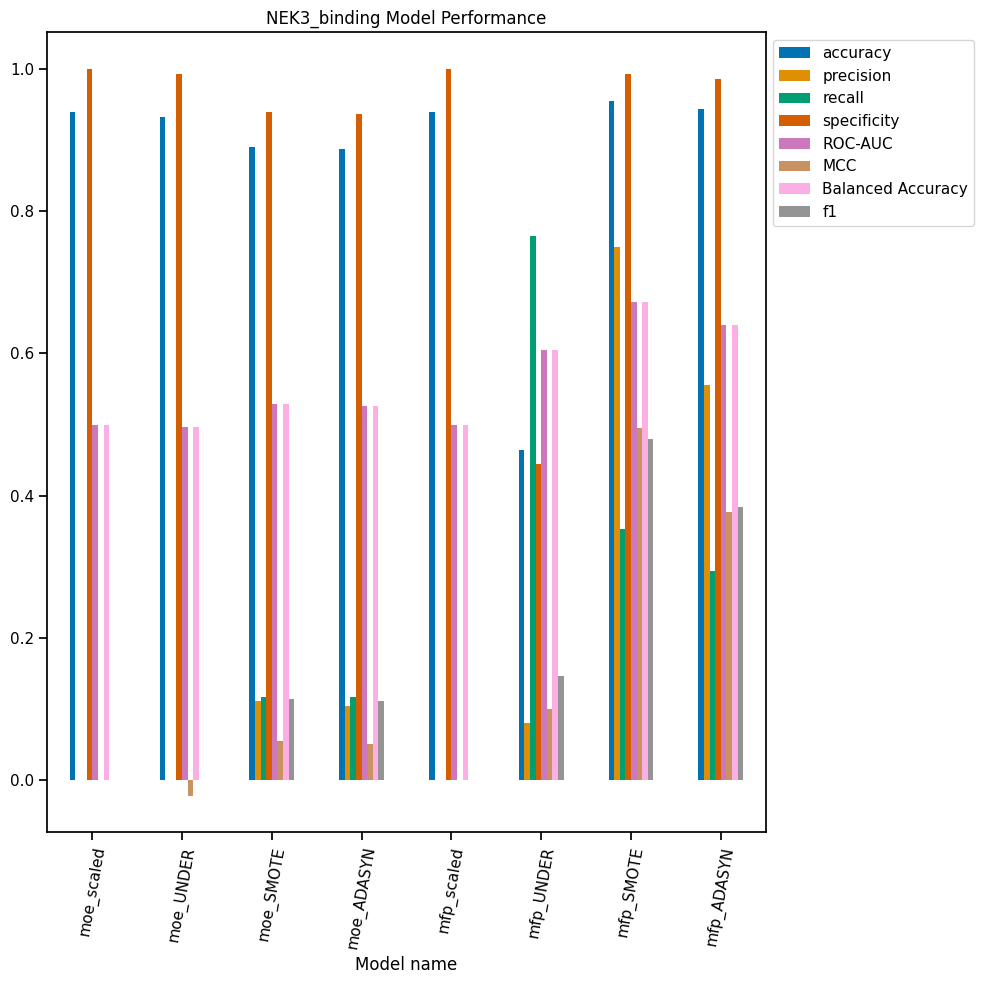

<Figure size 1200x1000 with 0 Axes>

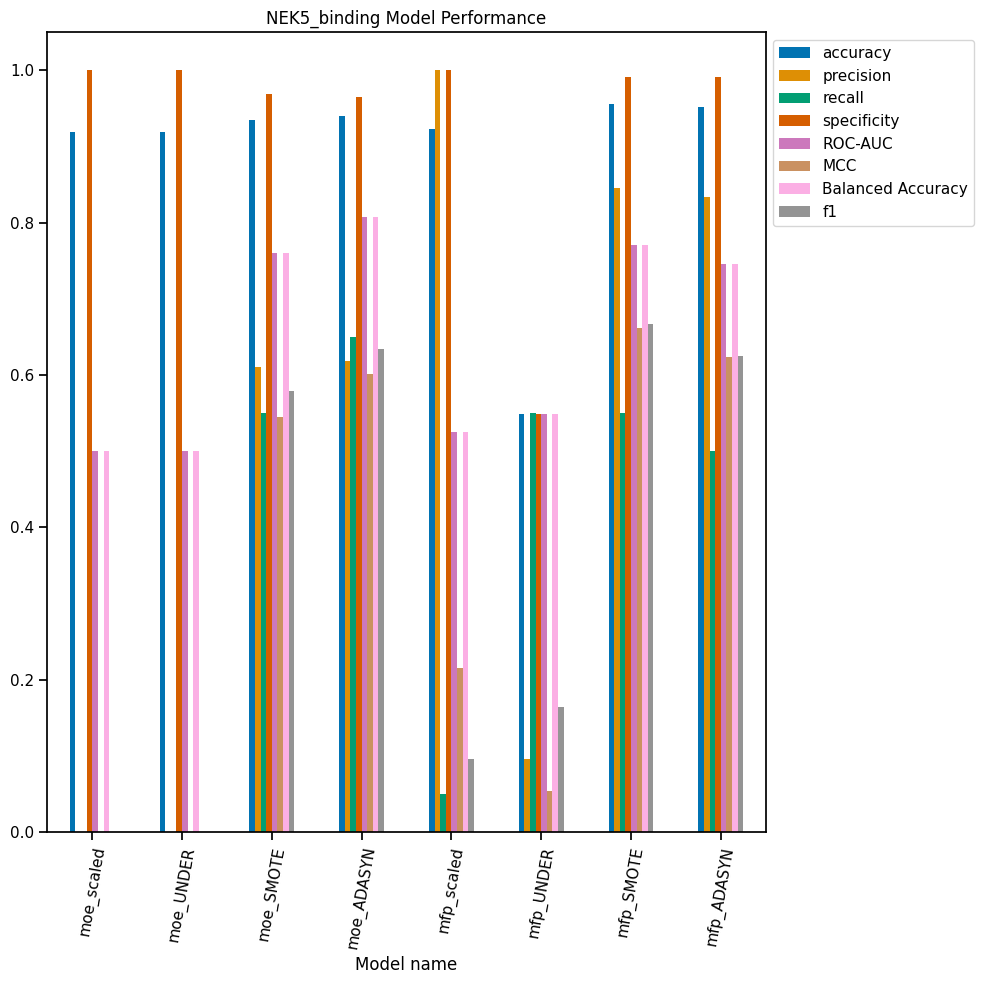

<Figure size 1200x1000 with 0 Axes>

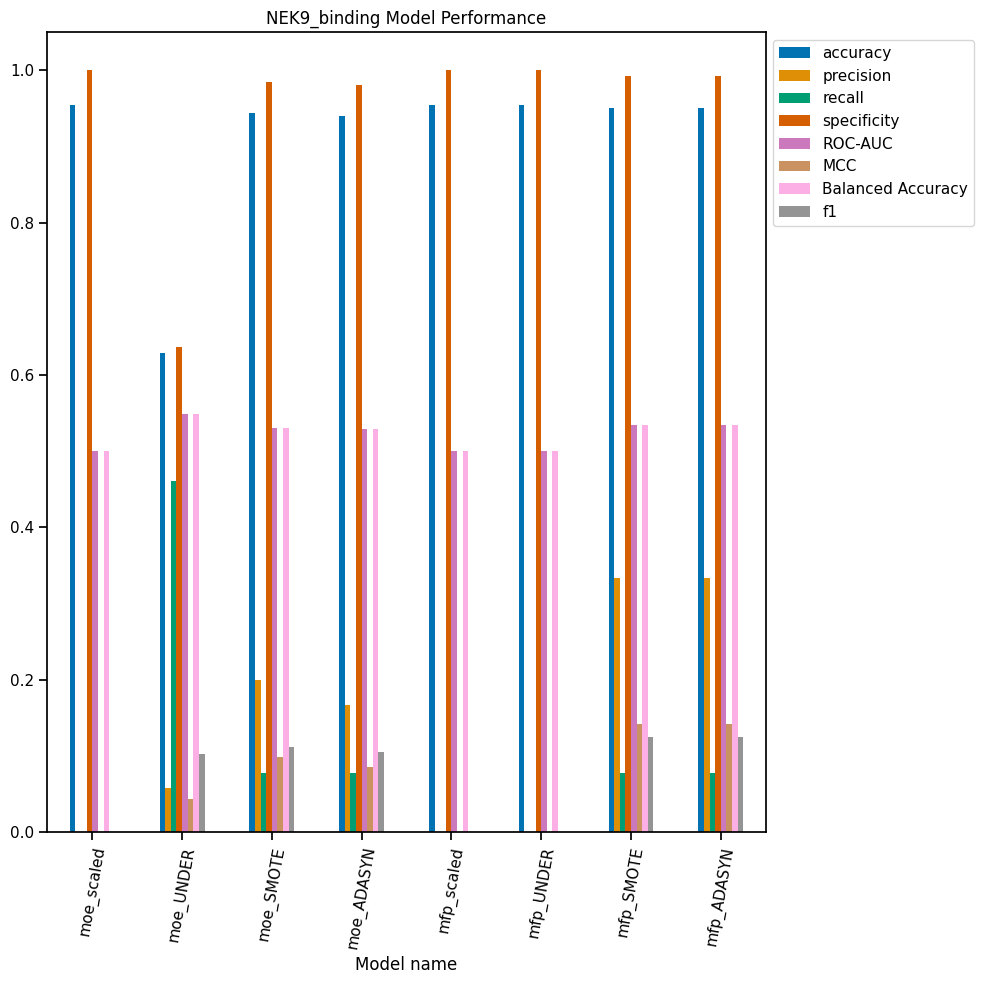

<Figure size 1200x1000 with 0 Axes>

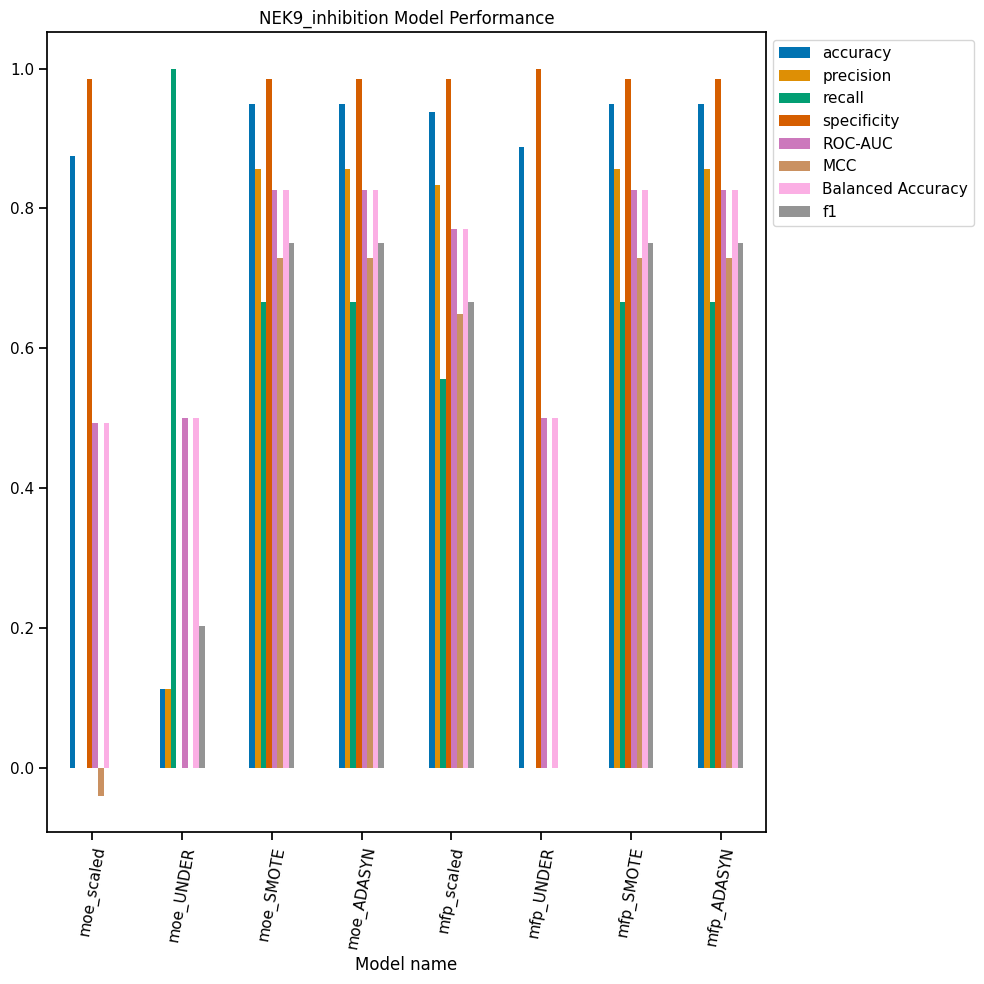

In [53]:

neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for n, nek in enumerate(neks): 
    df = test_df[test_df['NEK'] == nek]
    # df['model'] = df['feat_type'].astype(str)+'_'+df['strategy']
    # df.sort_values('feat_type') 
    plt.figure(figsize=(12, 10))
    ax = df.plot(x='dataset_category',kind='bar', figsize=(10,10))
    
    plt.xlabel('Model name')
    # plt.ylabel('Recall Score')
    plt.title(f'{nek} Model Performance')
    plt.xticks(rotation=80)  
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    # ax.legend(loc='upper left')
    
    plt.tight_layout()
    plt.savefig(f'figures/{nek}_GP_all_metrics.png')
    plt.show();
    

# Plotting above in subplots

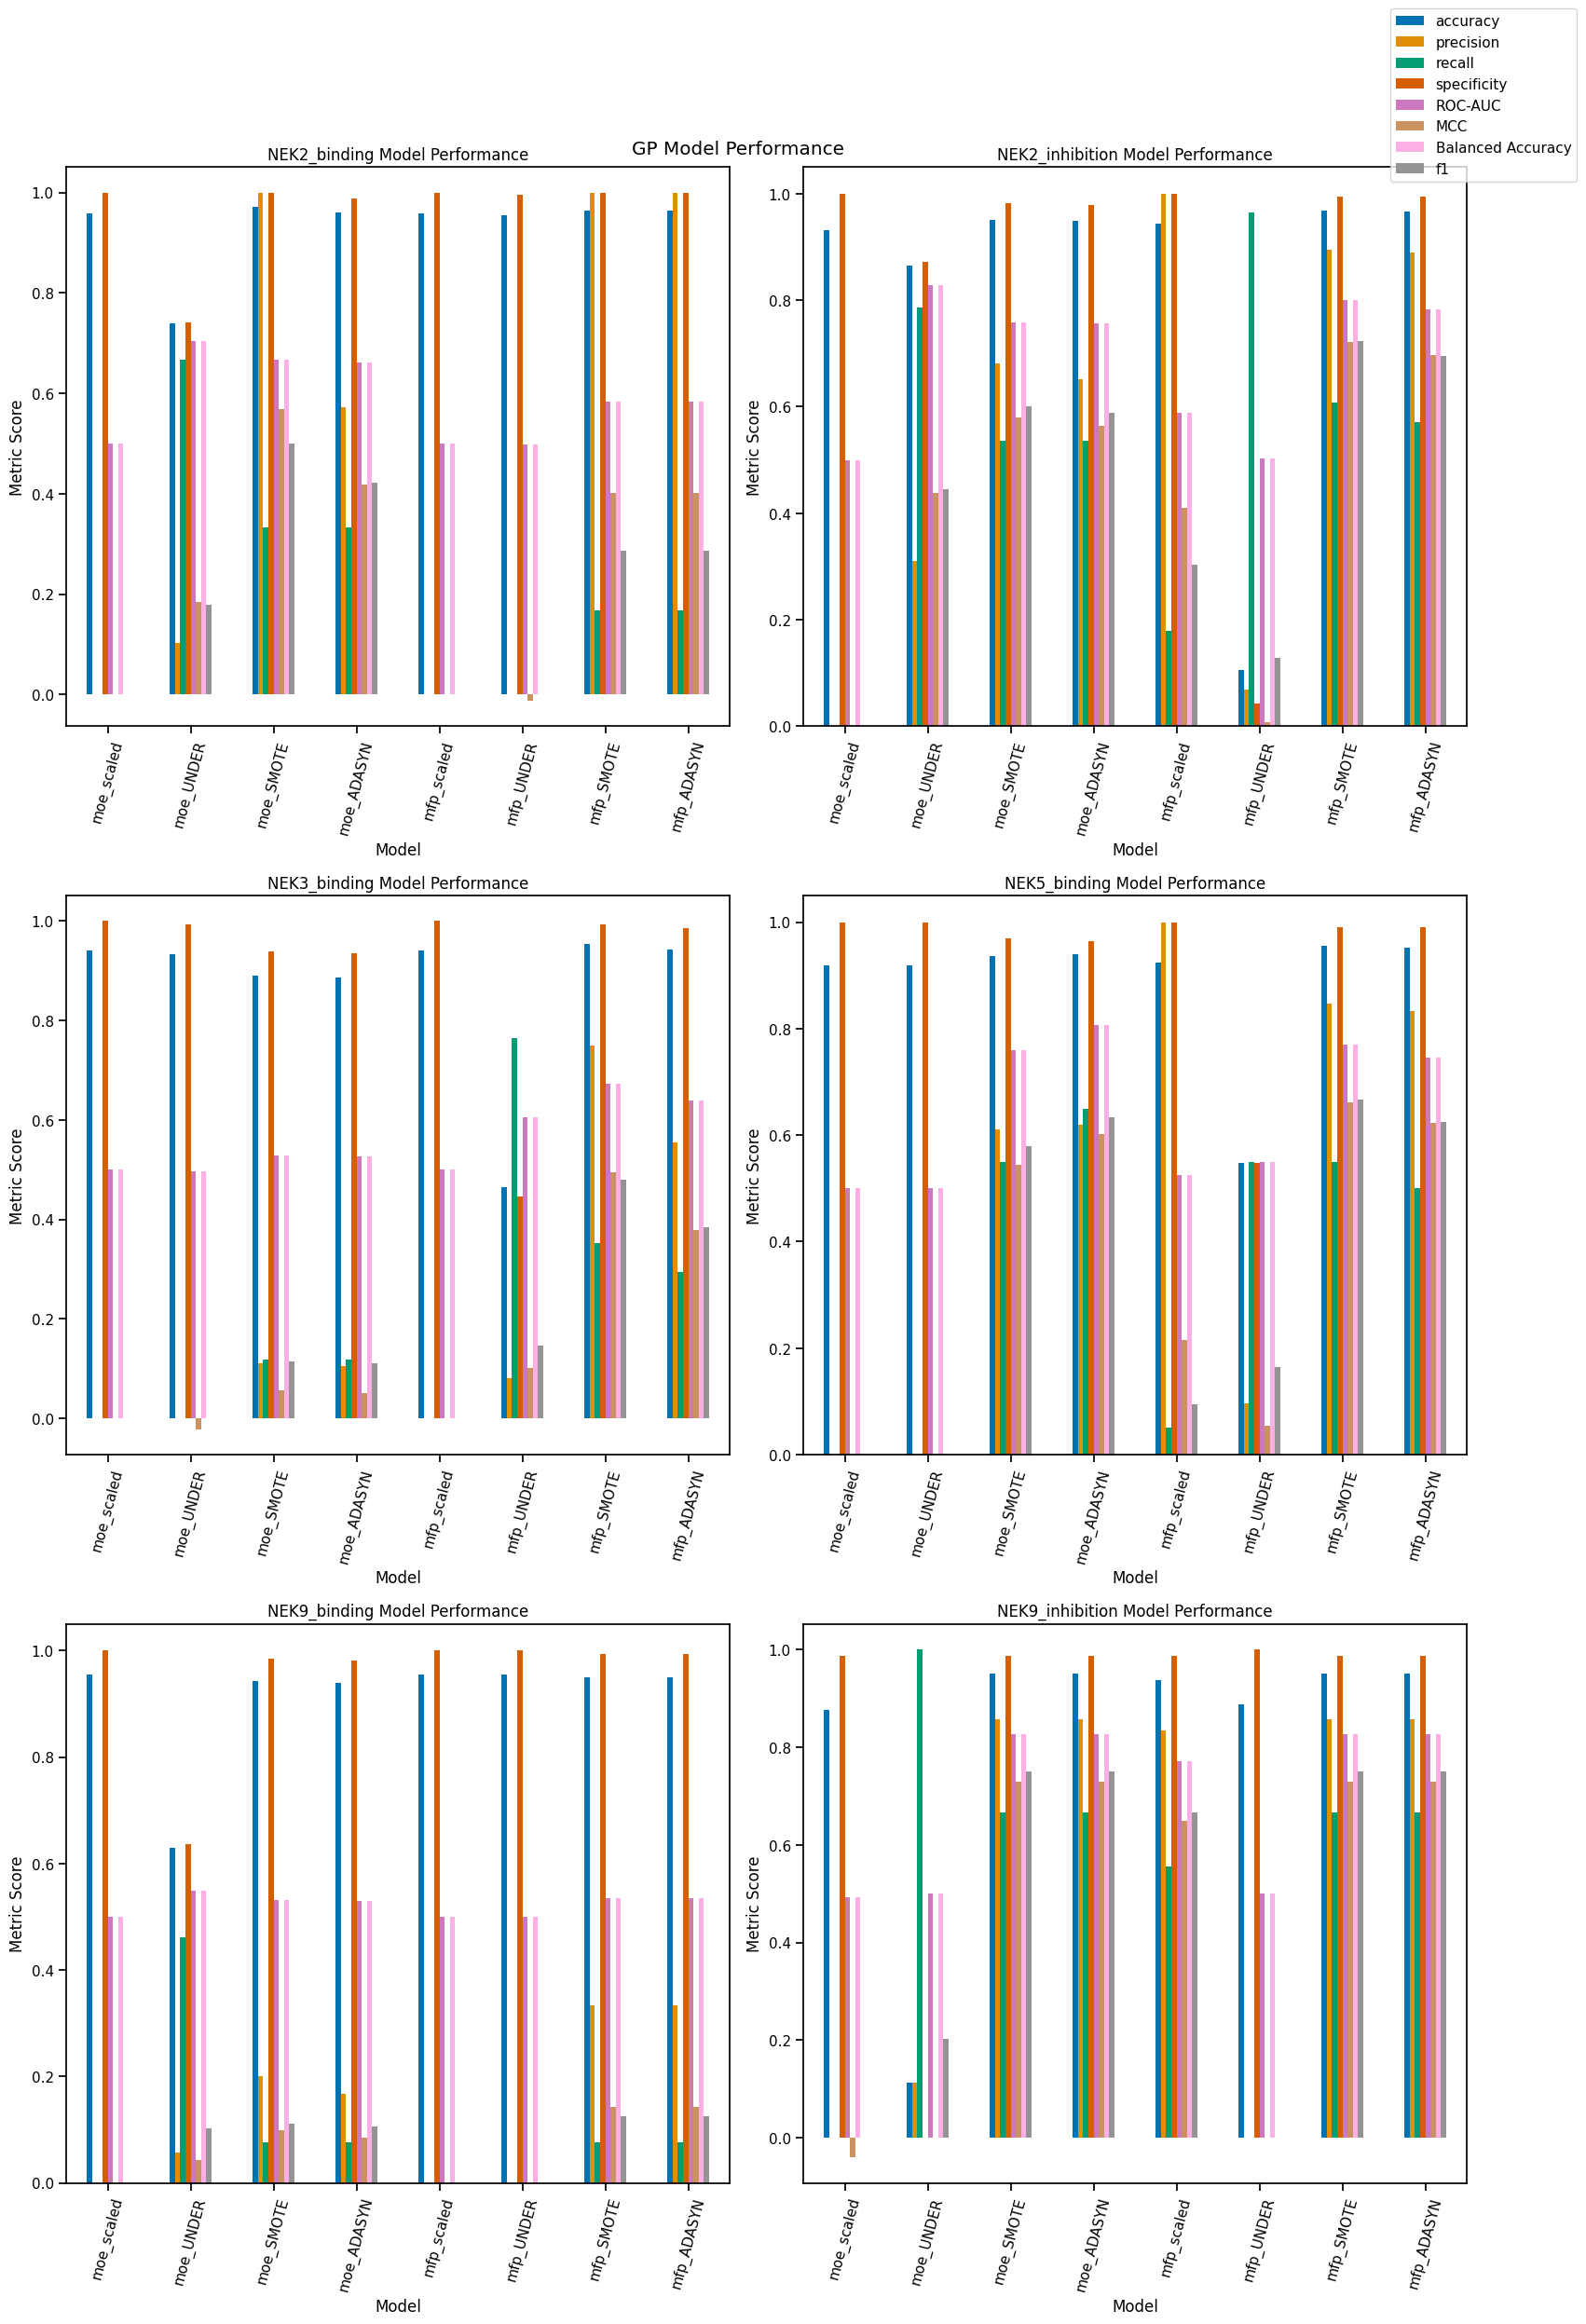

In [105]:
nek_dfs = [test_df[test_df['NEK'] == nek] for nek in neks]
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(3, 2, figsize=(16,24))
axes = axes.flatten()

for i, df in enumerate(nek_dfs):
    ax = axes[i]
    df.plot(x='dataset_category', kind='bar', ax=ax,legend=False)
    ax.set_xlabel('Model')
    ax.set_ylabel('Metric Score')
    ax.set_title(f'{neks[i]} Model Performance')
    ax.set_xticklabels(df['dataset_category'], rotation=75) 
handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='center', bbox_to_anchor=(1,1))
# fig.legend(loc='upper left',)
fig.subplots_adjust(top=0.5)
fig.suptitle('GP Model Performance')
plt.tight_layout()
plt.savefig(f'figures/all_GP_model_metrics.png',bbox_inches='tight')
plt.show();


In [436]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    print(nek)
    dflong=nek_df.melt(id_vars=['strategy', 'feat_type', 'model'], value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy',],
           var_name='Metric', value_name='Metric_value')
    dflong=dflong.sort_values('Metric')
    display(dflong)
   

NEK2_binding


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK2_binding_mfp_ADASYN_GP,Balanced Accuracy,0.583333
48,scaled,moe,NEK2_binding_moe_scaled_GP,Balanced Accuracy,0.500000
49,UNDER,moe,NEK2_binding_moe_UNDER_GP,Balanced Accuracy,0.704182
50,SMOTE,moe,NEK2_binding_moe_SMOTE_GP,Balanced Accuracy,0.664822
54,SMOTE,mfp,NEK2_binding_mfp_SMOTE_GP,Balanced Accuracy,0.583333
52,scaled,mfp,NEK2_binding_mfp_scaled_GP,Balanced Accuracy,0.500000
53,UNDER,mfp,NEK2_binding_mfp_UNDER_GP,Balanced Accuracy,0.498155
51,ADASYN,moe,NEK2_binding_moe_ADASYN_GP,Balanced Accuracy,0.661132
41,UNDER,moe,NEK2_binding_moe_UNDER_GP,MCC,0.184161
42,SMOTE,moe,NEK2_binding_moe_SMOTE_GP,MCC,0.504211


NEK2_inhibition


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK2_inhibition_mfp_ADASYN_GP,Balanced Accuracy,0.783090
48,scaled,moe,NEK2_inhibition_moe_scaled_GP,Balanced Accuracy,0.500000
49,UNDER,moe,NEK2_inhibition_moe_UNDER_GP,Balanced Accuracy,0.828553
50,SMOTE,moe,NEK2_inhibition_moe_SMOTE_GP,Balanced Accuracy,0.740814
54,SMOTE,mfp,NEK2_inhibition_mfp_SMOTE_GP,Balanced Accuracy,0.800947
52,scaled,mfp,NEK2_inhibition_mfp_scaled_GP,Balanced Accuracy,0.589286
53,UNDER,mfp,NEK2_inhibition_mfp_UNDER_GP,Balanced Accuracy,0.503140
51,ADASYN,moe,NEK2_inhibition_moe_ADASYN_GP,Balanced Accuracy,0.758671
41,UNDER,moe,NEK2_inhibition_moe_UNDER_GP,MCC,0.438116
42,SMOTE,moe,NEK2_inhibition_moe_SMOTE_GP,MCC,0.551096


NEK3_binding


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK3_binding_mfp_ADASYN_GP,Balanced Accuracy,0.639512
48,scaled,moe,NEK3_binding_moe_scaled_GP,Balanced Accuracy,0.500000
49,UNDER,moe,NEK3_binding_moe_UNDER_GP,Balanced Accuracy,0.496226
50,SMOTE,moe,NEK3_binding_moe_SMOTE_GP,Balanced Accuracy,0.528635
54,SMOTE,mfp,NEK3_binding_mfp_SMOTE_GP,Balanced Accuracy,0.672697
52,scaled,mfp,NEK3_binding_mfp_scaled_GP,Balanced Accuracy,0.500000
53,UNDER,mfp,NEK3_binding_mfp_UNDER_GP,Balanced Accuracy,0.604994
51,ADASYN,moe,NEK3_binding_moe_ADASYN_GP,Balanced Accuracy,0.526748
41,UNDER,moe,NEK3_binding_moe_UNDER_GP,MCC,-0.021406
42,SMOTE,moe,NEK3_binding_moe_SMOTE_GP,MCC,0.055761


NEK5_binding


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK5_binding_mfp_ADASYN_GP,Balanced Accuracy,0.745614
48,scaled,moe,NEK5_binding_moe_scaled_GP,Balanced Accuracy,0.500000
49,UNDER,moe,NEK5_binding_moe_UNDER_GP,Balanced Accuracy,0.500000
50,SMOTE,moe,NEK5_binding_moe_SMOTE_GP,Balanced Accuracy,0.755263
54,SMOTE,mfp,NEK5_binding_mfp_SMOTE_GP,Balanced Accuracy,0.770614
52,scaled,mfp,NEK5_binding_mfp_scaled_GP,Balanced Accuracy,0.525000
53,UNDER,mfp,NEK5_binding_mfp_UNDER_GP,Balanced Accuracy,0.549123
51,ADASYN,moe,NEK5_binding_moe_ADASYN_GP,Balanced Accuracy,0.807456
41,UNDER,moe,NEK5_binding_moe_UNDER_GP,MCC,0.000000
42,SMOTE,moe,NEK5_binding_moe_SMOTE_GP,MCC,0.510526


NEK9_binding


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK9_binding_mfp_ADASYN_GP,Balanced Accuracy,0.534758
48,scaled,moe,NEK9_binding_moe_scaled_GP,Balanced Accuracy,0.500000
49,UNDER,moe,NEK9_binding_moe_UNDER_GP,Balanced Accuracy,0.549288
50,SMOTE,moe,NEK9_binding_moe_SMOTE_GP,Balanced Accuracy,0.531054
54,SMOTE,mfp,NEK9_binding_mfp_SMOTE_GP,Balanced Accuracy,0.534758
52,scaled,mfp,NEK9_binding_mfp_scaled_GP,Balanced Accuracy,0.500000
53,UNDER,mfp,NEK9_binding_mfp_UNDER_GP,Balanced Accuracy,0.500000
51,ADASYN,moe,NEK9_binding_moe_ADASYN_GP,Balanced Accuracy,0.531054
41,UNDER,moe,NEK9_binding_moe_UNDER_GP,MCC,0.042804
42,SMOTE,moe,NEK9_binding_moe_SMOTE_GP,MCC,0.098695


NEK9_inhibition


,strategy,feat_type,model,Metric,Metric_value
55,ADASYN,mfp,NEK9_inhibition_mfp_ADASYN_GP,Balanced Accuracy,0.826291
48,scaled,moe,NEK9_inhibition_moe_scaled_GP,Balanced Accuracy,0.492958
49,UNDER,moe,NEK9_inhibition_moe_UNDER_GP,Balanced Accuracy,0.500000
50,SMOTE,moe,NEK9_inhibition_moe_SMOTE_GP,Balanced Accuracy,0.826291
54,SMOTE,mfp,NEK9_inhibition_mfp_SMOTE_GP,Balanced Accuracy,0.826291
52,scaled,mfp,NEK9_inhibition_mfp_scaled_GP,Balanced Accuracy,0.770736
53,UNDER,mfp,NEK9_inhibition_mfp_UNDER_GP,Balanced Accuracy,0.500000
51,ADASYN,moe,NEK9_inhibition_moe_ADASYN_GP,Balanced Accuracy,0.826291
41,UNDER,moe,NEK9_inhibition_moe_UNDER_GP,MCC,0.000000
42,SMOTE,moe,NEK9_inhibition_moe_SMOTE_GP,MCC,0.729752


# Selecting best strategy/feat for metrics 

In [437]:
def select_winner(df, compare_type): 
    metrics = ['accuracy',	'precision',	'recall',	'specificity',	'ROC-AUC',	'MCC',	'Balanced Accuracy' ,'f1'] 
    df_result = pd.DataFrame(columns=metrics)
    results=[]
    for compare in df[compare_type].unique():
        compare_df = df[df[compare_type] == compare]
        
        best_feat_types = {'compare': compare}

        for met in metrics:
            best_feat_type = compare_df.loc[compare_df[met].idxmax()]
            best_feat_types[met] = best_feat_type[met]
            best_feat_types['feat_type'] = best_feat_type['feat_type']
            best_feat_types['model'] = best_feat_type['model']
            best_feat_types['strategy'] = best_feat_type['strategy']
            best_feat_types['NEK'] = best_feat_type['NEK']

        results.append(best_feat_types)

    final_results = pd.DataFrame(results)
    return final_results
    

In [438]:
testdf = nek_df = test_df[test_df['NEK'] =='NEK2_binding']
ranked_nek2 = select_winner(testdf, 'strategy')
ranked_nek2

,compare,accuracy,feat_type,model,strategy,NEK,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1
0,scaled,0.957597,moe,NEK2_binding_moe_scaled_GP,scaled,NEK2_binding,0.000000,0.000000,1.00000,0.500000,0.000000,0.500000,0.000000
1,UNDER,0.954064,moe,NEK2_binding_moe_UNDER_GP,UNDER,NEK2_binding,0.102564,0.666667,0.99631,0.704182,0.184161,0.704182,0.177778
2,SMOTE,0.968198,moe,NEK2_binding_moe_SMOTE_GP,SMOTE,NEK2_binding,1.000000,0.333333,1.00000,0.664822,0.504211,0.664822,0.470588
3,ADASYN,0.964664,moe,NEK2_binding_moe_ADASYN_GP,ADASYN,NEK2_binding,1.000000,0.333333,1.00000,0.661132,0.418102,0.661132,0.421053


# For each metric print moe or mfp if that metric had a better score 

In [55]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    # print(nek)
    metrics = ['accuracy',	'precision',	'recall',	'specificity',	'ROC-AUC',	'MCC',	'Balanced Accuracy' ,'f1'] 
    df_result = pd.DataFrame(columns=metrics)
    results=[]
    # for met in metrics:

    #     metric_acc = nek_df.groupby('feat_type')[met].max().idxmax()
    #     df_result.loc[0, met] = metric_acc
        
    # df_result['NEK'] = nek
    # results.append(df_result)
    results = []
    
    for nek in neks:
        nek_df = test_df[test_df['NEK'] == nek]
        
        
        for strategy in nek_df['strategy'].unique():
            strat_df = nek_df[nek_df['strategy'] == strategy]
            model = nek_df['model'] 
            # display(strat_df)
            best_feat_types = {}
    
            for met in metrics:
                best_feat_type = strat_df.groupby('feat_type')[met].max().idxmax()
                best_feat_types[met] = best_feat_type
    
            best_feat_types['NEK'] = nek
            best_feat_types['strategy'] = strategy
            best_feat_types['model'] = 'GP'
            results.append(best_feat_types)

    final_results = pd.DataFrame(results)
    display(final_results)
    # print()
        
        

,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,scaled,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,scaled,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,scaled,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,scaled,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,scaled,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,scaled,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,scaled,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,scaled,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,scaled,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,scaled,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,scaled,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,scaled,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,scaled,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,scaled,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,scaled,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


,accuracy,precision,recall,specificity,ROC-AUC,MCC,Balanced Accuracy,f1,NEK,strategy,model
0,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_binding,scaled,GP
1,mfp,moe,moe,mfp,moe,moe,moe,moe,NEK2_binding,UNDER,GP
2,moe,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,SMOTE,GP
3,mfp,mfp,moe,mfp,moe,moe,moe,moe,NEK2_binding,ADASYN,GP
4,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,scaled,GP
5,moe,moe,mfp,moe,moe,moe,moe,moe,NEK2_inhibition,UNDER,GP
6,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,SMOTE,GP
7,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK2_inhibition,ADASYN,GP
8,mfp,mfp,mfp,mfp,mfp,mfp,mfp,mfp,NEK3_binding,scaled,GP
9,moe,mfp,mfp,moe,mfp,mfp,mfp,mfp,NEK3_binding,UNDER,GP


# adding a new column with strategy_feat

In [58]:
plot_df = test_df.copy()
# plot_df['dataset'] = plot_df['strategy'].str.cat(plot_df['feat_type'],sep='_')


# sub plots for each metric 

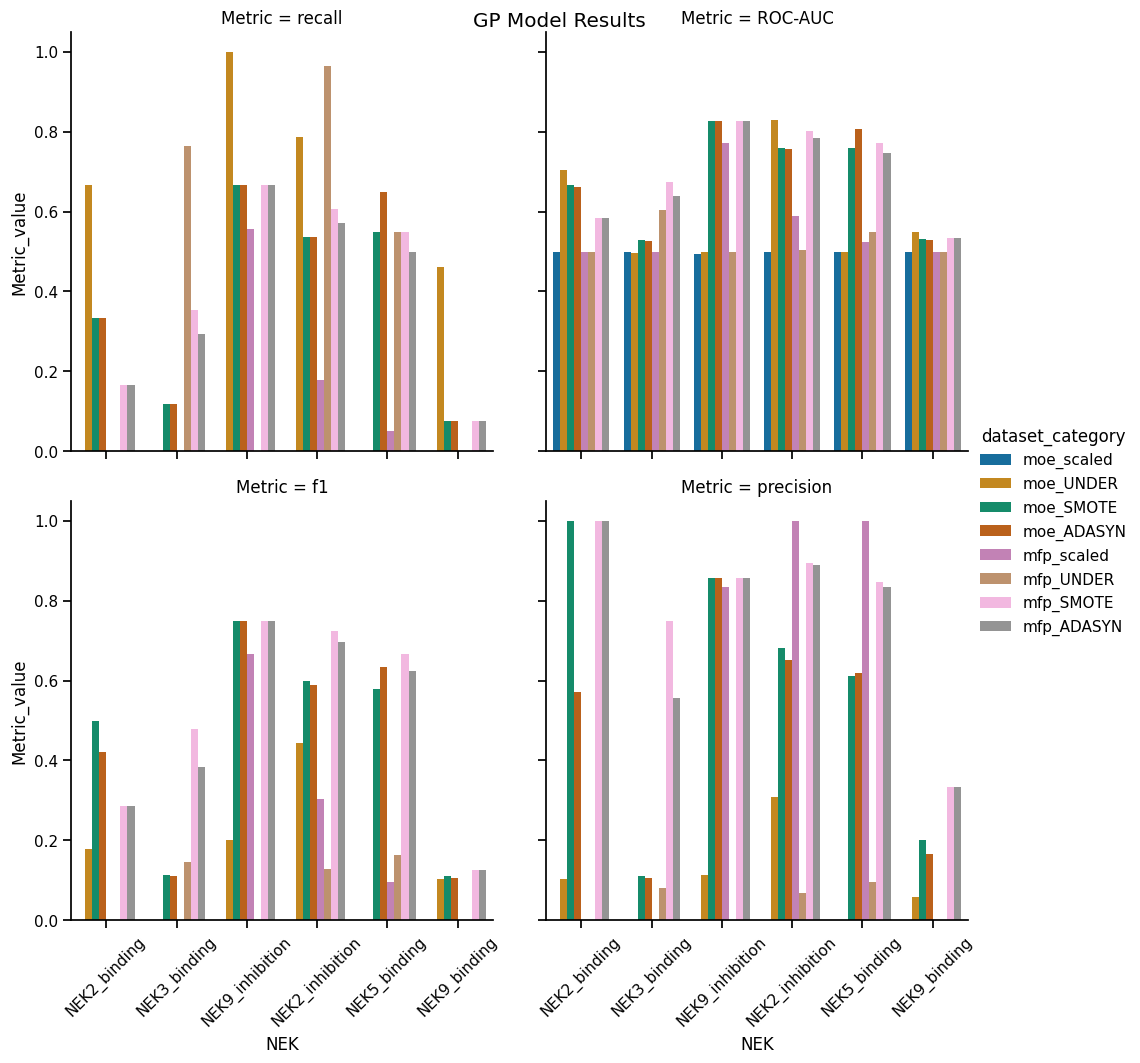

In [59]:
dflong=plot_df.melt(id_vars=['NEK', 'dataset_category', 'model'], value_vars=['recall', 'f1', 'ROC-AUC', 'precision'],
           var_name='Metric', value_name='Metric_value')
dflong=dflong.sort_values('dataset_category', ascending=False)
# display(dflong)
sns.set_context('notebook')
sns.set_palette('colorblind')
# grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=3, s=70, jitter=0.2)
grid=sns.catplot(dflong, x='NEK', y='Metric_value', hue='dataset_category', col='Metric',  kind='bar', col_wrap=2)
# plt.ylabel('Recall Score')
# kwargs={'loc':(0.79, 0.15)}
# sns.move_legend(grid, (0.6, 0.15))
# grid.fig.subplots_adjust(top=0.95)
for ax in grid.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
# plt.xticks(rotation=80)  
grid.fig.suptitle(f'GP Model Results');
# plt.savefig(f"figures/GP_NEK_recall_scores.png")

plt.show();
    

# Same plot above but just for recall
recall scores for each NEK dataset

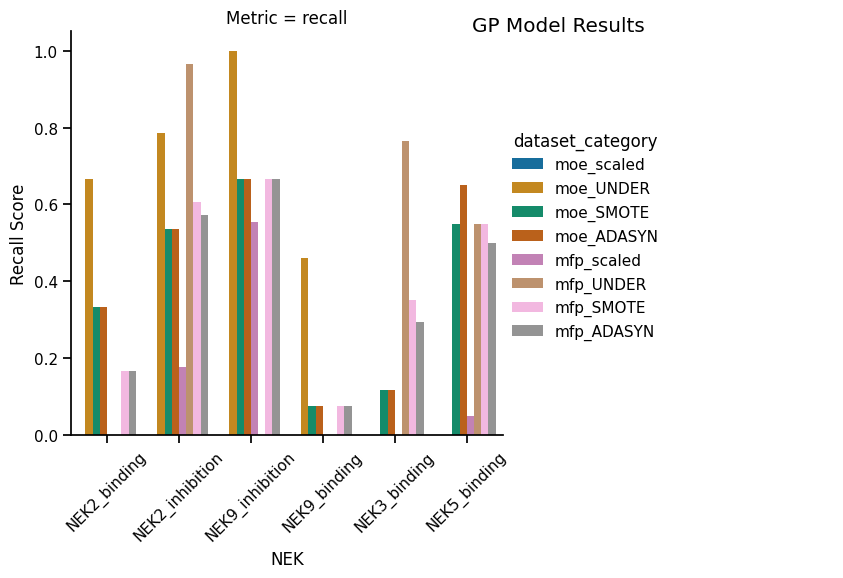

In [61]:
dflong=plot_df.melt(id_vars=['NEK', 'dataset_category', 'model'], value_vars=['recall'],
           var_name='Metric', value_name='Metric_value')
dflong=dflong.sort_values('dataset_category', ascending=False)
# display(dflong)
sns.set_context('notebook')
sns.set_palette('colorblind')
# grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=3, s=70, jitter=0.2)
grid=sns.catplot(dflong, x='NEK', y='Metric_value', hue='dataset_category', col='Metric',  kind='bar', col_wrap=2)
plt.ylabel('Recall Score')
# kwargs={'loc':(0.79, 0.15)}
sns.move_legend(grid, (0.6, 0.4))
grid.fig.subplots_adjust(top=0.95)
for ax in grid.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
# plt.xticks(rotation=80)  
grid.fig.suptitle(f'GP Model Results');
plt.savefig(f"figures/GP_NEK_recall_scores.png",bbox_inches='tight')

plt.show();
    

# recall scores for each nek dataset

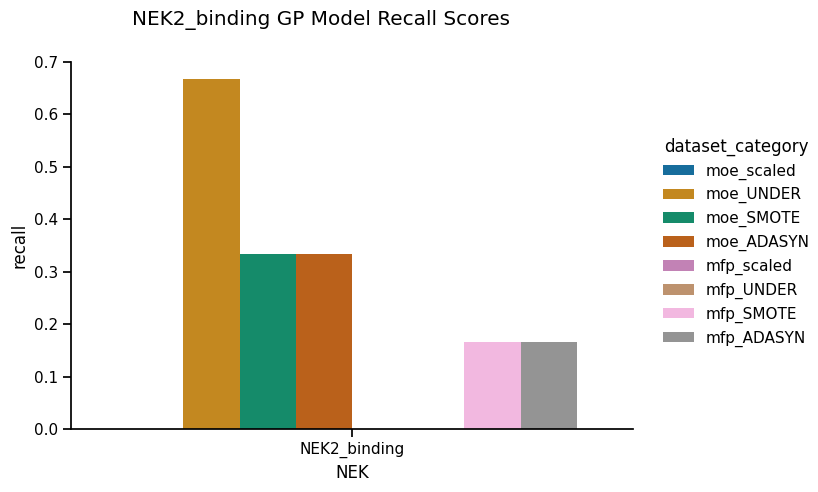

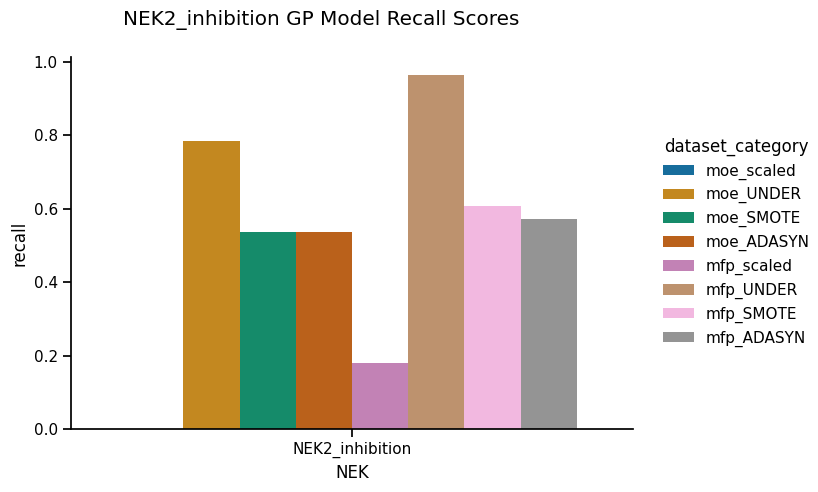

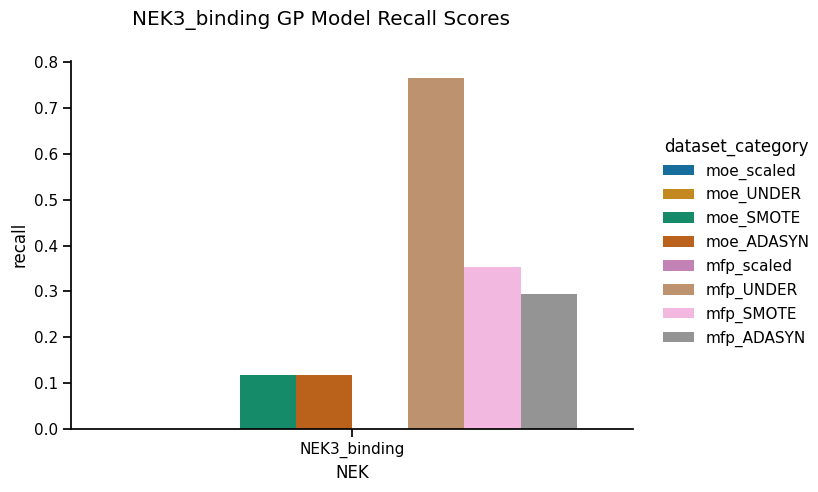

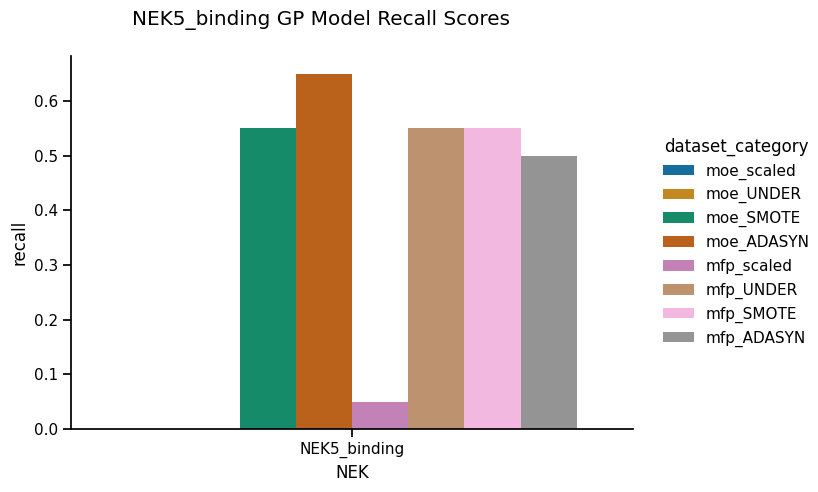

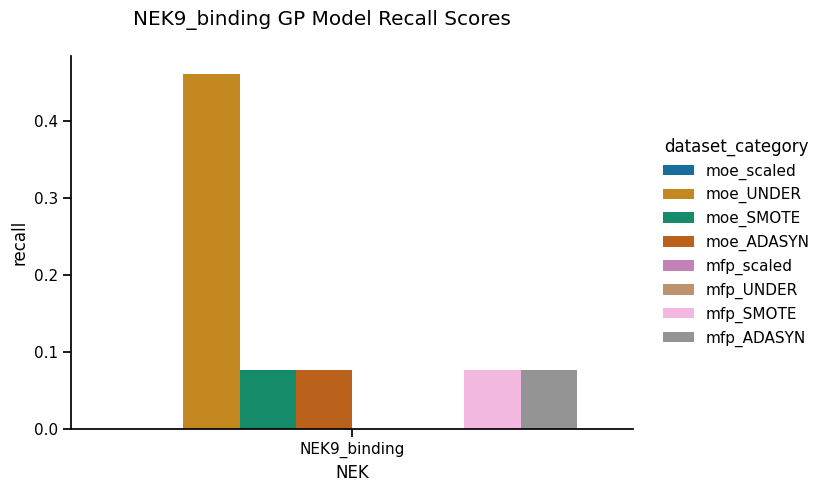

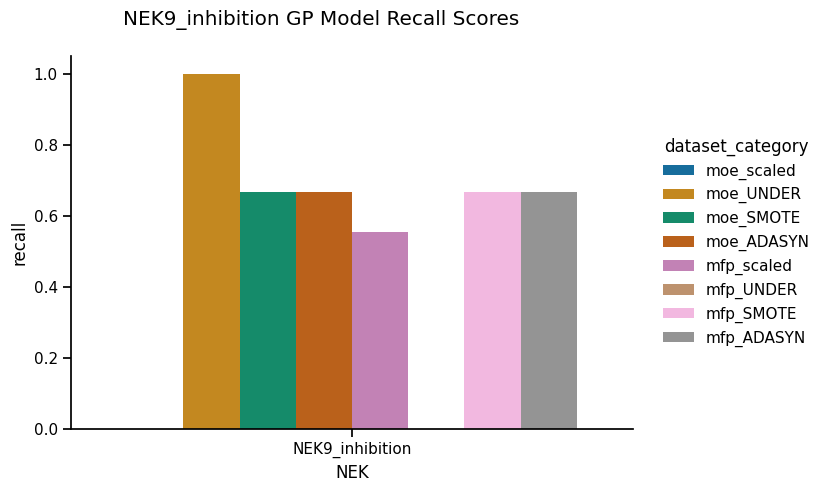

In [63]:

neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
for n, nek in enumerate(neks): 
    nek_df = plot_df[plot_df['NEK'] ==nek]
    # pl = sns.catplot(data=plot_df,x='NEK', y='recall', hue='strategy', col='feat_type', kind='bar')
    pl = sns.catplot(data=nek_df,x='NEK', y='recall', hue='dataset_category', kind='bar')
    # for ax in pl.axes.flat:
    #     for label in ax.get_xticklabels():
            # label.set_rotation(80)
    plt.suptitle(f'{nek} GP Model Recall Scores')
    # plt.legend(loc='center right')
    pl._legend.set_bbox_to_anchor([1.25, 0.5])
    # pl._legend.set_frame_on(False)
    
    plt.subplots_adjust(top=0.9)
    plt.tight_layout()
    plt.savefig(f"figures/GP_{nek}_recall_scores_individ.png",bbox_inches='tight')
    plt.show();


# Recall scores for each model, but subplot for moe and mfp separately

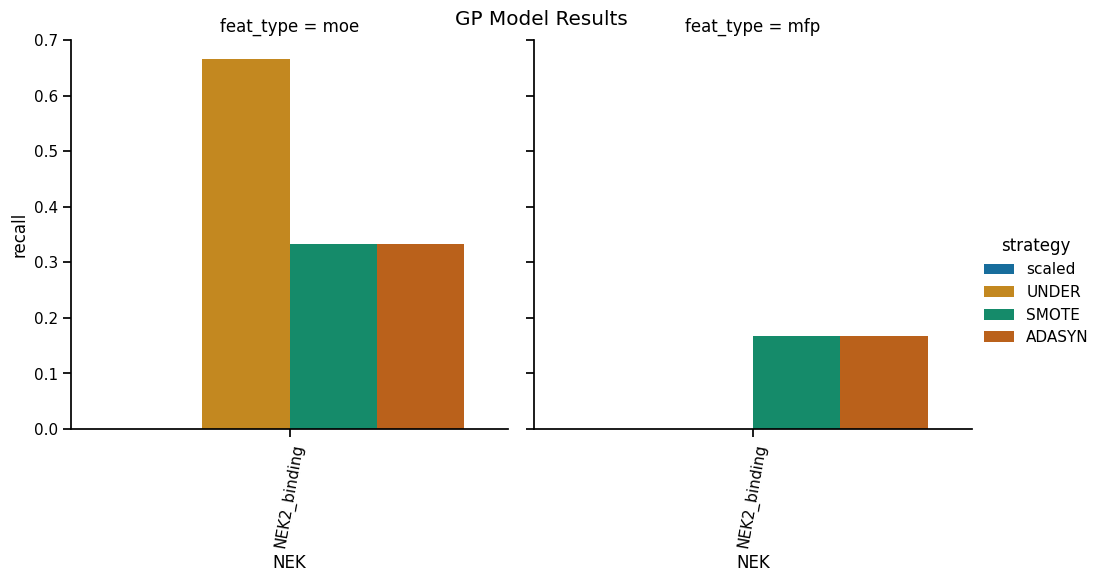

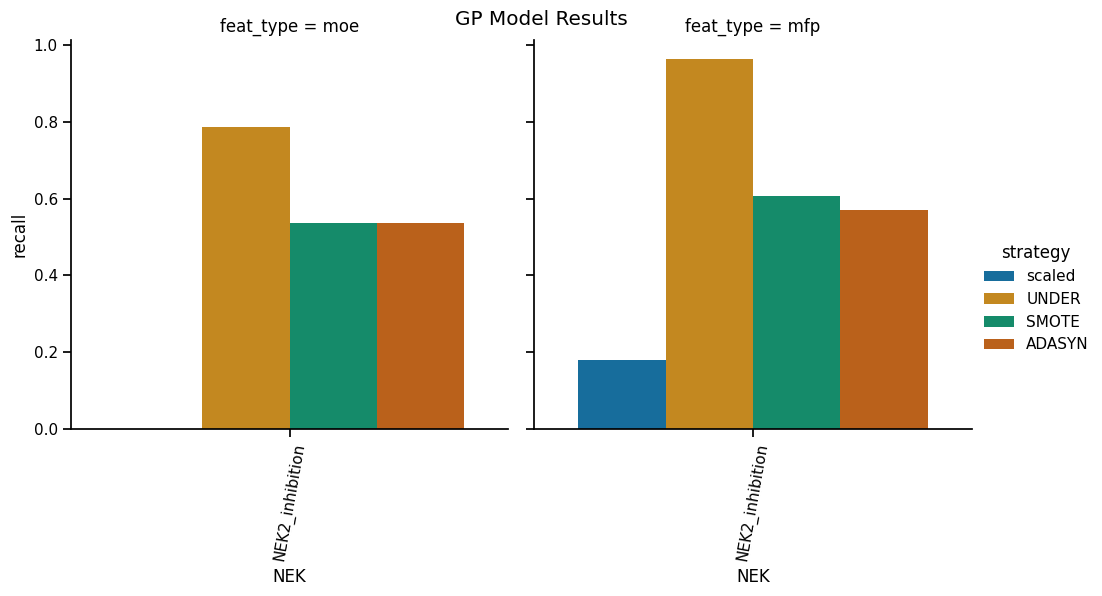

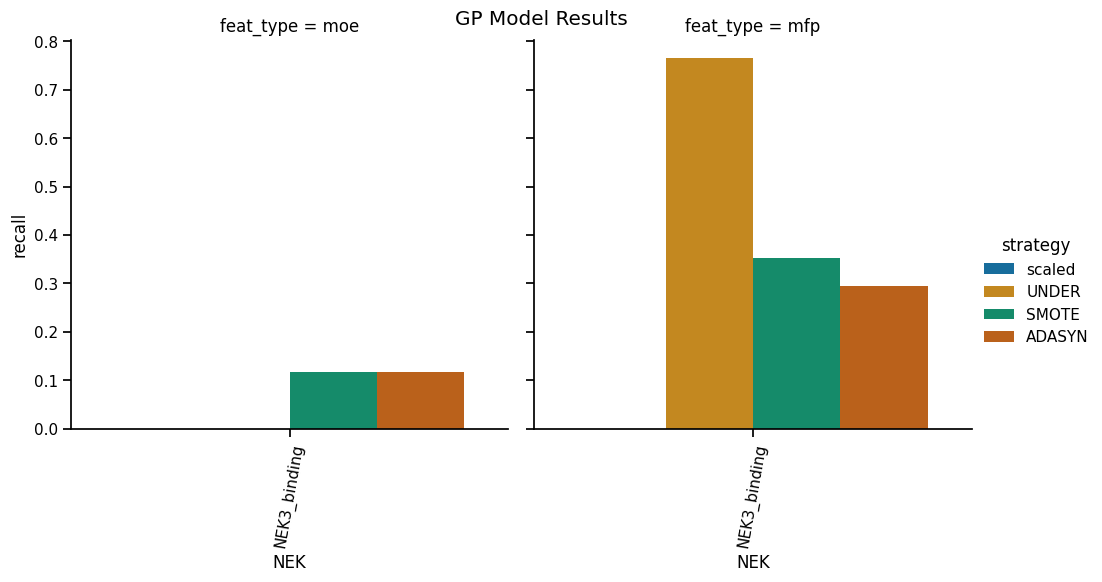

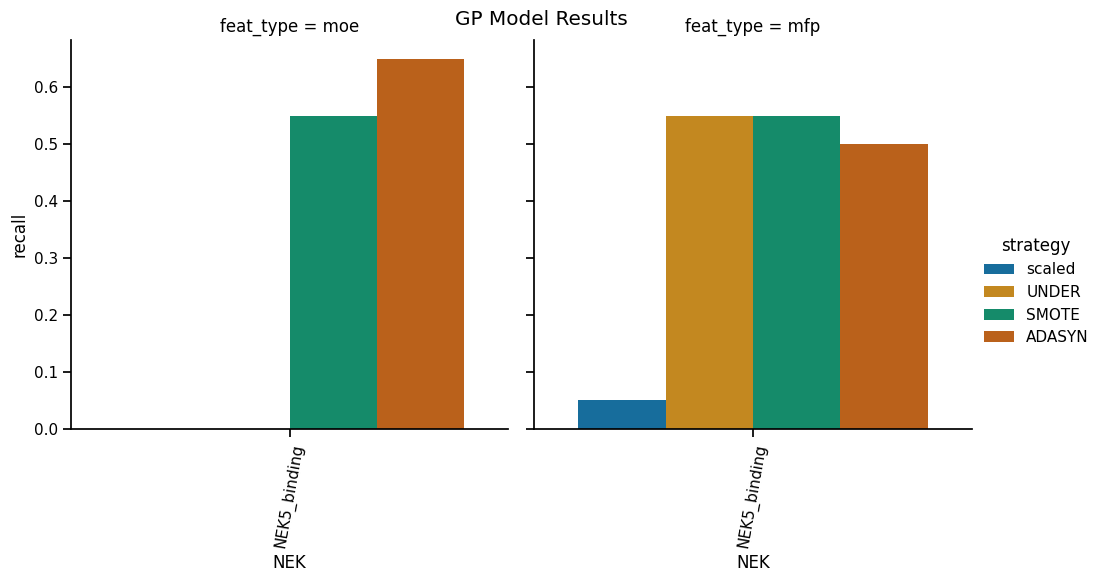

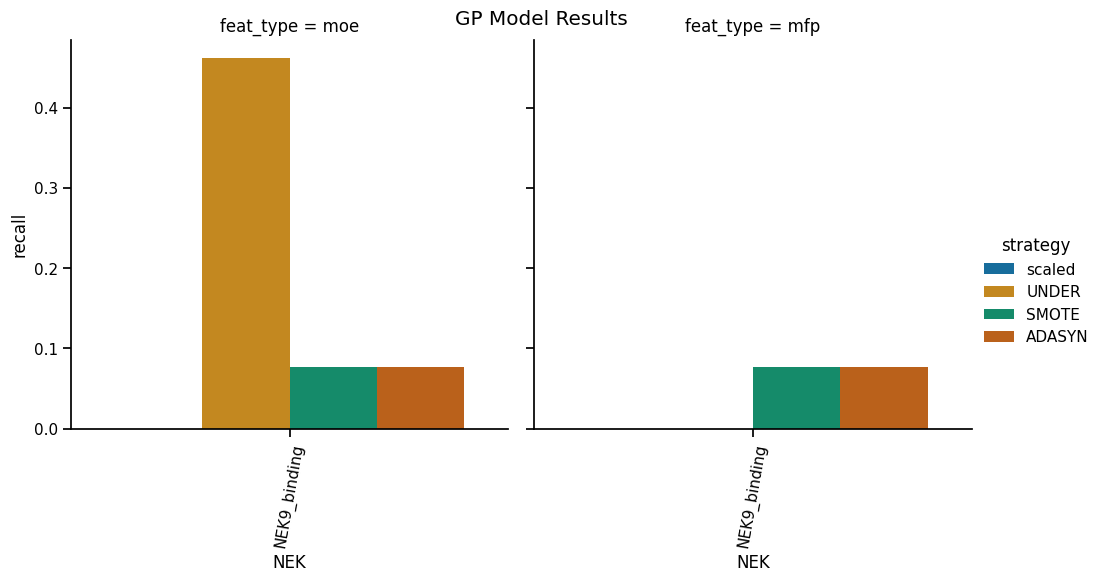

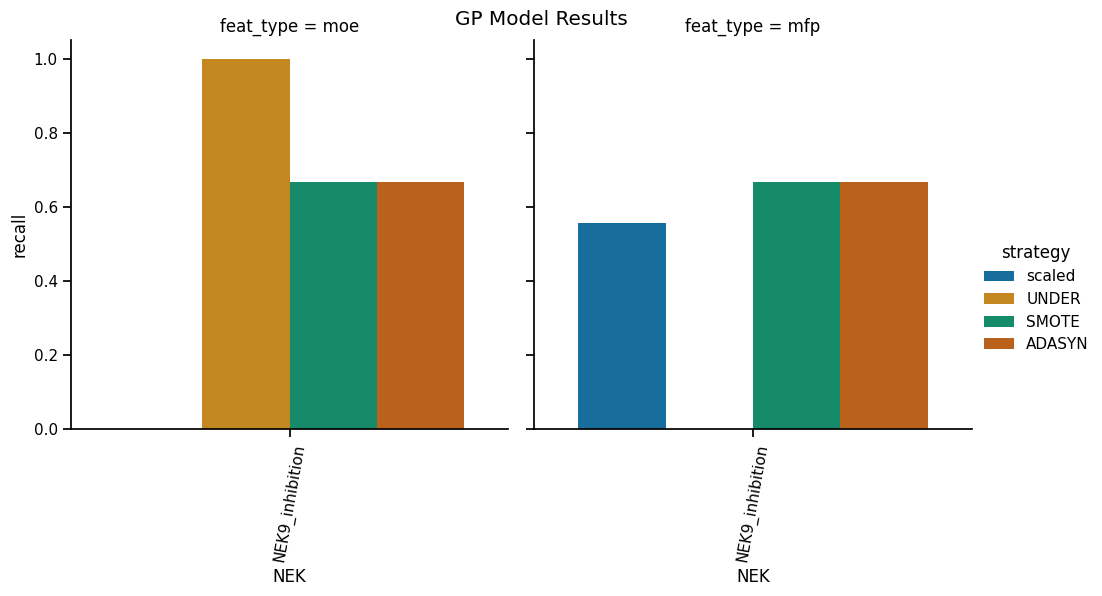

In [65]:
# plt.bar(df['model'], df['recall'])

# value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1']
value_vars=['recall']
for n, nek in enumerate(neks): 
    nek_df = plot_df[plot_df['NEK'] ==nek]
    dflong=nek_df.melt(id_vars=['NEK', 'dataset_category', 'strategy','model'], value_vars=['recall'],
           var_name='Metric', value_name='Metric_value')
    dflong=dflong.sort_values('dataset_category', ascending=False)
    # display(dflong)
    sns.set_context('notebook')
    sns.set_palette('colorblind')

    grid=sns.catplot(data=nek_df,x='NEK', y='recall', hue='strategy', col='feat_type', kind='bar')
    for ax in grid.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(80)
    # plt.ylabel('Recall Score')
    # kwargs={'loc':(0.79, 0.15)}
    # sns.move_legend(grid, (0.6, 0.15))
    # grid.fig.subplots_adjust(top=0.95)
    plt.xticks(rotation=80)  
    grid.fig.suptitle(f'GP Model Results');

# all nek recall scores dataset type as barcolors  

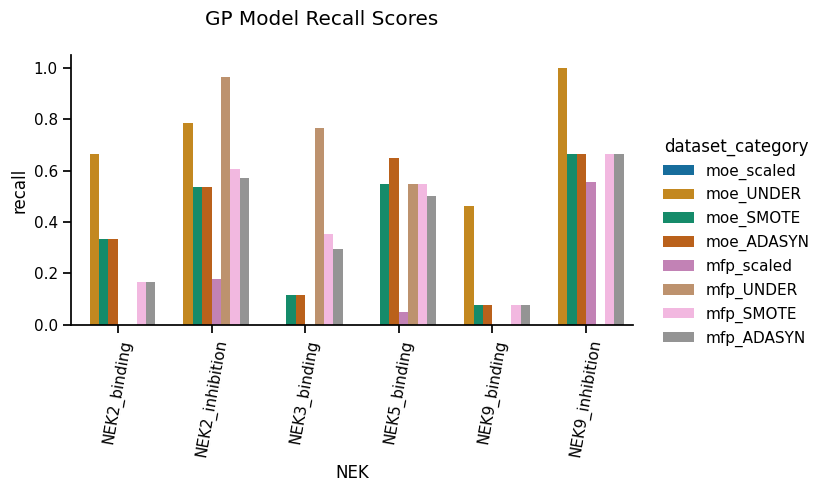

In [66]:


# pl = sns.catplot(data=plot_df,x='NEK', y='recall', hue='strategy', col='feat_type', kind='bar') # subplots ofr moe and mfp 
pl = sns.catplot(data=plot_df,x='NEK', y='recall', hue='dataset_category', kind='bar') # all on one plot
for ax in pl.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(80)
plt.suptitle(f'GP Model Recall Scores')
pl._legend.set_bbox_to_anchor([1.25, 0.5])

plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.savefig(f"figures/GP_recall_scores_all_NEK.png",bbox_inches='tight')
plt.show();


# Comparing recall scores 


NEK2_binding


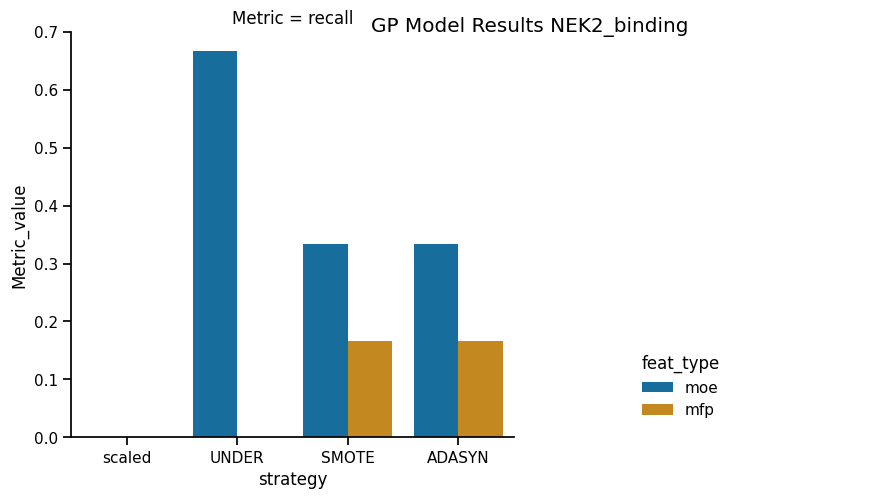


NEK2_inhibition


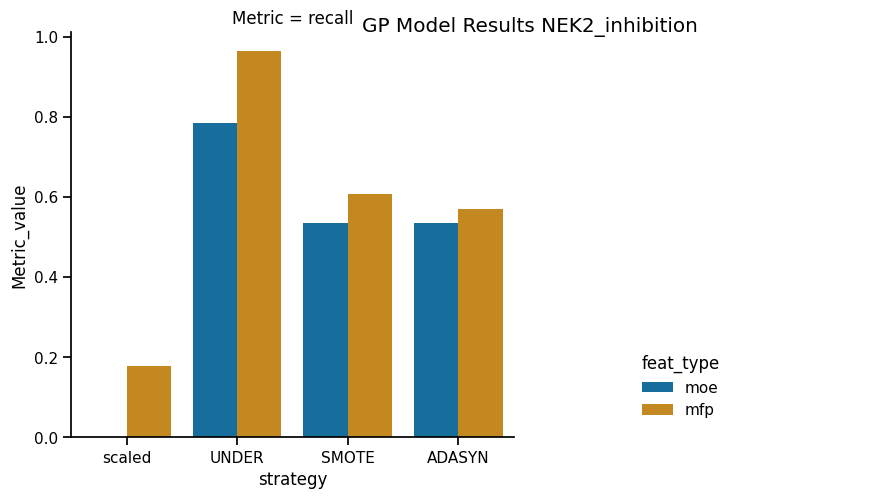


NEK3_binding


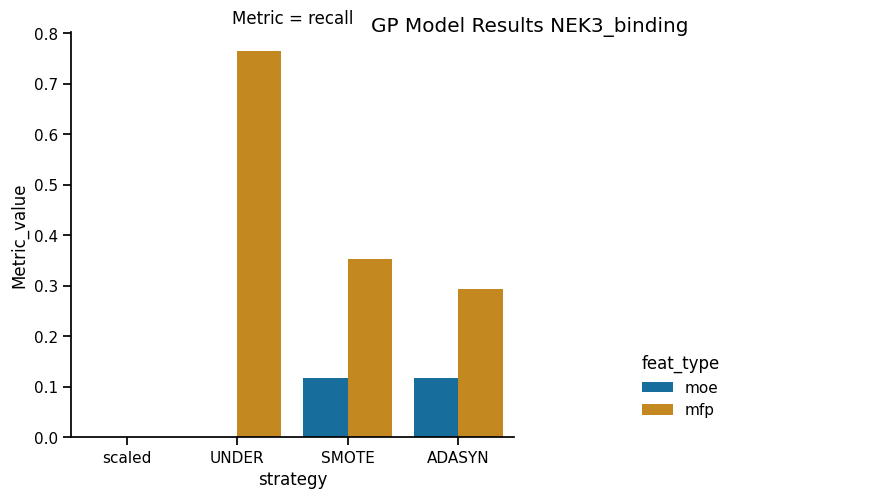


NEK5_binding


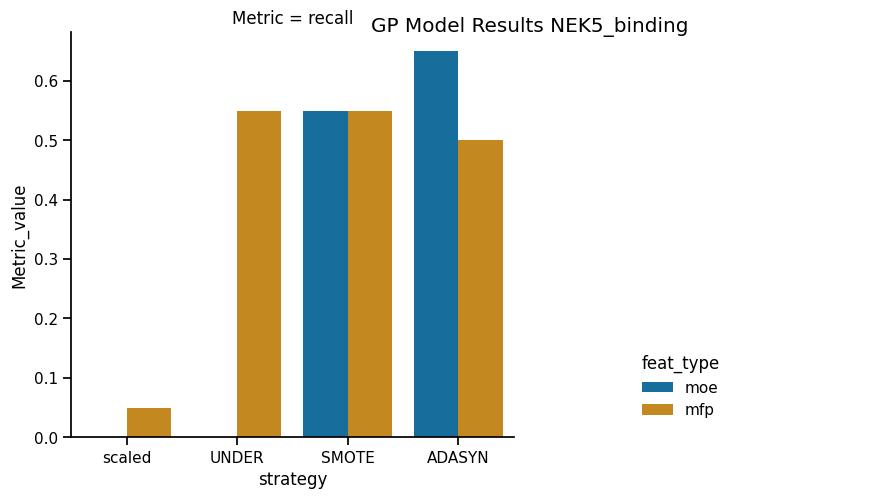


NEK9_binding


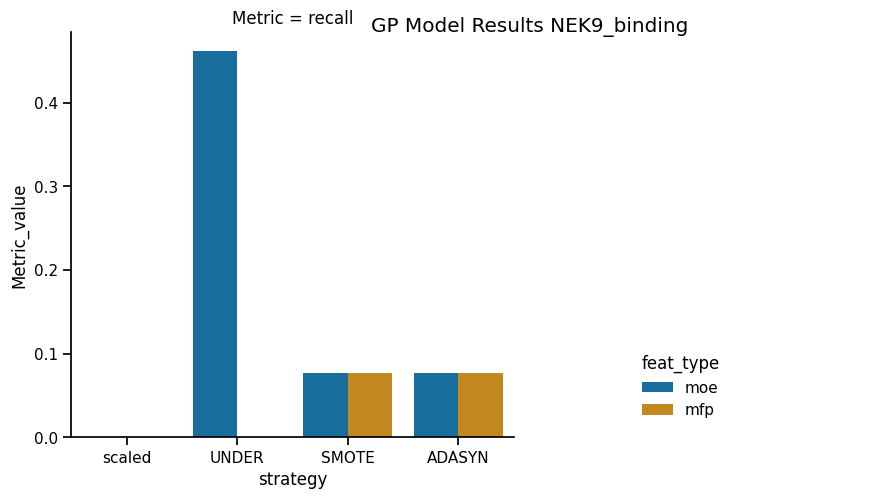


NEK9_inhibition


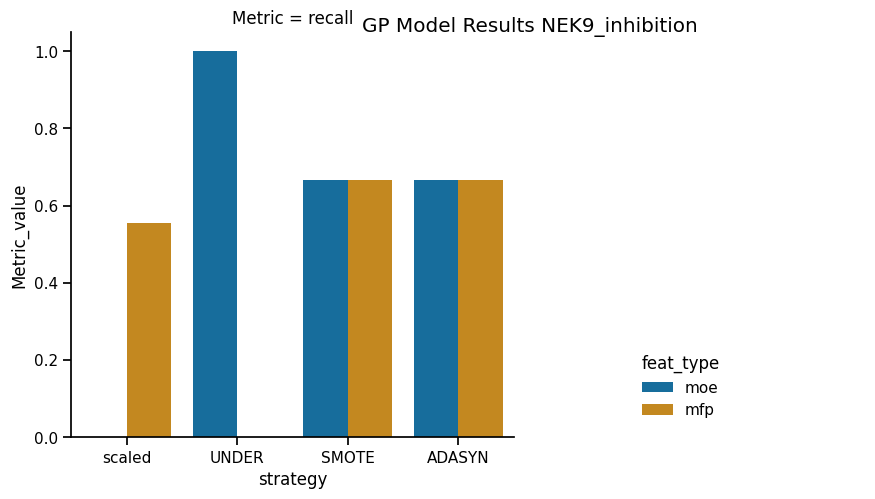

In [72]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
# value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1']
value_vars=['recall']
for n, nek in enumerate(neks): 
    nek_df = test_df[test_df['NEK'] ==nek]
    print(nek)
    dflong=nek_df.melt(id_vars=['strategy', 'feat_type', 'model'], value_vars=['recall'],
           var_name='Metric', value_name='Metric_value')
    dflong=dflong.sort_values('Metric')
    # display(dflong)
    sns.set_context('notebook')
    sns.set_palette('colorblind')
    # grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=3, s=70, jitter=0.2)
    grid=sns.catplot(dflong, x='strategy', y='Metric_value', hue='feat_type', col='Metric',  kind='bar', col_wrap=2)
    # kwargs={'loc':(0.79, 0.15)}
    sns.move_legend(grid, (0.725, 0.15))
    grid.fig.subplots_adjust(top=0.95)
    
    grid.fig.suptitle(f'GP Model Results {nek}');
    plt.savefig(f"figures/GP_{nek}_metrics_catplot_splitmoemfp.png")
    
    plt.show();
    
    print()

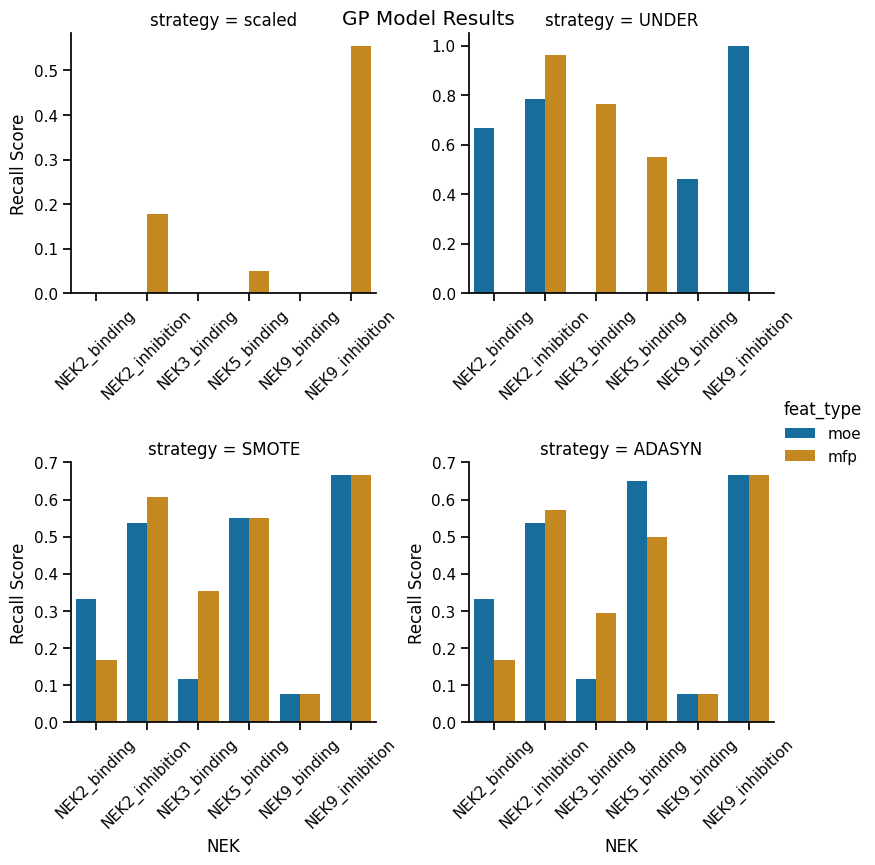

In [94]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
# value_vars=['accuracy','precision', 'recall','specificity', 'ROC-AUC', 'MCC', 'Balanced Accuracy','f1']
value_vars=['recall']

dflong=plot_df.melt(id_vars=['strategy', 'feat_type', 'model','NEK'], value_vars=['recall'],
       var_name='Metric', value_name='Recall Score')
dflong=dflong.sort_values('NEK')
grid=sns.catplot(dflong, x='NEK', y='Recall Score', hue='feat_type', col='strategy',  kind='bar', col_wrap=2,height=4,sharex=False, sharey=False)
# sns.move_legend(grid, (0.9, 0.5))
plt.ylabel('Recall Score')
grid.fig.subplots_adjust(hspace=0.65)
grid.fig.subplots_adjust(top=0.95)
for ax in grid.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
grid.fig.suptitle(f'GP Model Results');
plt.savefig(f"figures/GP_NEK_recall_by_strategy.png",bbox_inches='tight')

plt.show();

print()

# Comparison of imbalance

In [448]:

# for n, nek in enumerate(neks): 
#     nek_df = plot_df[plot_df['NEK'] ==nek]
#     plt.figure()
#     print(nek)
    
#     g = sns.scatterplot(data=nek_df, x='precision', y='recall', hue='strategy', size='percent_active', style=None, palette=None, hue_order=None, hue_norm=None, 
#                         sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None)
#     # g = sns.scatterplot(data=nek_df, x='percent_active', y='recall', hue='strategy', size='feat_type', style=None, palette=None, hue_order=None, hue_norm=None, 
#     #                     sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None)
#     # sns.move_legend(grid, (1, 0.15))
#     plt.legend(loc='upper center')
#     # g.fig.subplots_adjust(top=0.95)
    
    
#     plt.show();
    


In [70]:
plot_df['NEK#'] = plot_df['NEK'].str[0:4]
# plot_df['NEK_strat'] = plot_df['NEK'].str().concat(plot_df[')

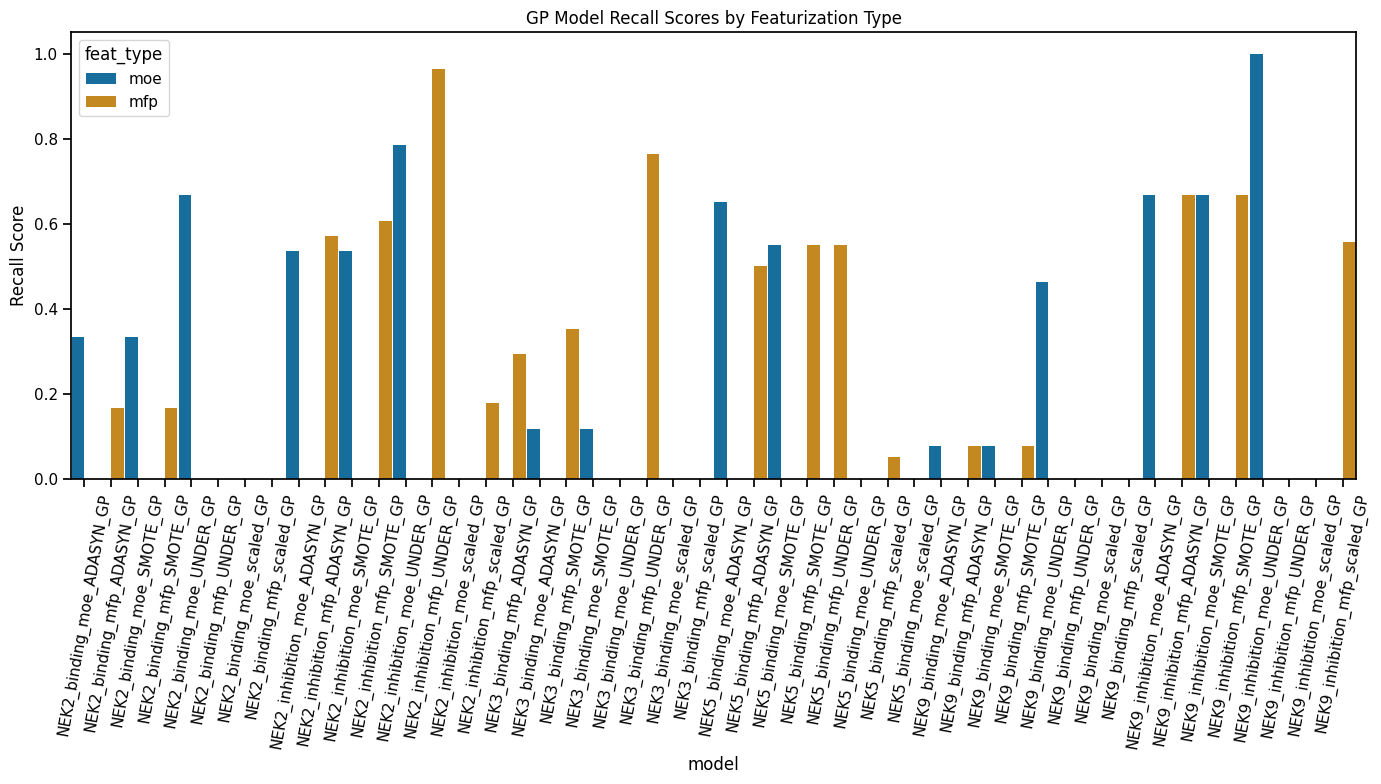

In [99]:
neks = ['NEK2_binding', 'NEK2_inhibition','NEK3_binding', 'NEK5_binding', 'NEK9_binding','NEK9_inhibition']
dflong=plot_df.melt(id_vars=['NEK#','NEK','dataset_category','model', 'feat_type', 'strategy'], value_vars=['recall'],
       var_name='Metric', value_name='Metric_value')
dflong=dflong.sort_values('Metric')
dflong = dflong.sort_values(by=['NEK', 'strategy'], ascending=[True, True])
# dflong =dflong.sort_values('strategy')
sns.set_context('notebook')
sns.set_palette('colorblind')

# grid=sns.catplot(dflong, x='model', y='Metric_value', hue='feat_type', col='strategy',  kind='bar', col_wrap=2)
plt.figure(figsize=(14, 8))
sns.barplot(data=dflong, x='model', y='Metric_value', hue='feat_type', dodge=True, width=0.95)

plt.ylabel('Recall Score')
# kwargs={'loc':(0.79, 0.15)}
sns.move_legend(grid, (0.9, 0.15))
grid.fig.subplots_adjust(top=0.95)

for ax in grid.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(80)
plt.xticks(rotation=80)
plt.title('GP Model Recall Scores by Featurization Type')
plt.tight_layout()
# grid.fig.suptitle(f'GP Model Results {nek}');
plt.savefig(f"figures/GP_all_recall_moemfp.png")

plt.show();

print()


In [113]:
print('GP average recall scores')
for nek in neks: 
    nek_df = test_df[test_df['NEK']==nek]
    average_recall = nek_df['recall'].mean()
    print(f'{nek} average recall score: {average_recall}')

GP average recall scores
NEK2_binding average recall score: 0.20833333333333331
NEK2_inhibition average recall score: 0.5223214285714286
NEK3_binding average recall score: 0.20588235294117646
NEK5_binding average recall score: 0.35625000000000007
NEK9_binding average recall score: 0.09615384615384615
NEK9_inhibition average recall score: 0.5277777777777777


In [451]:
for n in neks: 
    print(n)
    cols = ['NEK', 'feat_type', 'strategy',	'precision',	'recall','cm']
    csv_df = test_df[test_df['NEK']==n]
    grouped_by = csv_df.groupby('strategy')
    for n, gr in grouped_by: 
        display(gr[cols])
    print()
        

NEK2_binding


,NEK,feat_type,strategy,precision,recall,cm
3,NEK2_binding,moe,ADASYN,0.571429,0.333333,"[268, 3, 8, 4]"
7,NEK2_binding,mfp,ADASYN,1.000000,0.166667,"[271, 0, 10, 2]"


,NEK,feat_type,strategy,precision,recall,cm
2,NEK2_binding,moe,SMOTE,0.8,0.333333,"[270, 1, 8, 4]"
6,NEK2_binding,mfp,SMOTE,1.0,0.166667,"[271, 0, 10, 2]"


,NEK,feat_type,strategy,precision,recall,cm
1,NEK2_binding,moe,UNDER,0.102564,0.666667,"[201, 70, 4, 8]"
5,NEK2_binding,mfp,UNDER,0.000000,0.000000,"[270, 1, 12, 0]"


,NEK,feat_type,strategy,precision,recall,cm
0,NEK2_binding,moe,scaled,0.0,0.0,"[271, 0, 12, 0]"
4,NEK2_binding,mfp,scaled,0.0,0.0,"[271, 0, 12, 0]"



NEK2_inhibition


,NEK,feat_type,strategy,precision,recall,cm
11,NEK2_inhibition,moe,ADASYN,0.681818,0.535714,"[374, 7, 13, 15]"
15,NEK2_inhibition,mfp,ADASYN,0.888889,0.571429,"[379, 2, 12, 16]"


,NEK,feat_type,strategy,precision,recall,cm
10,NEK2_inhibition,moe,SMOTE,0.666667,0.500000,"[374, 7, 14, 14]"
14,NEK2_inhibition,mfp,SMOTE,0.894737,0.607143,"[379, 2, 11, 17]"


,NEK,feat_type,strategy,precision,recall,cm
9,NEK2_inhibition,moe,UNDER,0.309859,0.785714,"[332, 49, 6, 22]"
13,NEK2_inhibition,mfp,UNDER,0.068878,0.964286,"[16, 365, 1, 27]"


,NEK,feat_type,strategy,precision,recall,cm
8,NEK2_inhibition,moe,scaled,0.0,0.000000,"[381, 0, 28, 0]"
12,NEK2_inhibition,mfp,scaled,1.0,0.178571,"[381, 0, 23, 5]"



NEK3_binding


,NEK,feat_type,strategy,precision,recall,cm
19,NEK3_binding,moe,ADASYN,0.105263,0.117647,"[248, 17, 15, 2]"
23,NEK3_binding,mfp,ADASYN,0.555556,0.294118,"[261, 4, 12, 5]"


,NEK,feat_type,strategy,precision,recall,cm
18,NEK3_binding,moe,SMOTE,0.111111,0.117647,"[249, 16, 15, 2]"
22,NEK3_binding,mfp,SMOTE,0.750000,0.352941,"[263, 2, 11, 6]"


,NEK,feat_type,strategy,precision,recall,cm
17,NEK3_binding,moe,UNDER,0.00000,0.000000,"[263, 2, 17, 0]"
21,NEK3_binding,mfp,UNDER,0.08125,0.764706,"[118, 147, 4, 13]"


,NEK,feat_type,strategy,precision,recall,cm
16,NEK3_binding,moe,scaled,0.0,0.0,"[265, 0, 17, 0]"
20,NEK3_binding,mfp,scaled,0.0,0.0,"[265, 0, 17, 0]"



NEK5_binding


,NEK,feat_type,strategy,precision,recall,cm
27,NEK5_binding,moe,ADASYN,0.619048,0.65,"[220, 8, 7, 13]"
31,NEK5_binding,mfp,ADASYN,0.833333,0.50,"[226, 2, 10, 10]"


,NEK,feat_type,strategy,precision,recall,cm
26,NEK5_binding,moe,SMOTE,0.550000,0.55,"[219, 9, 9, 11]"
30,NEK5_binding,mfp,SMOTE,0.846154,0.55,"[226, 2, 9, 11]"


,NEK,feat_type,strategy,precision,recall,cm
25,NEK5_binding,moe,UNDER,0.000000,0.00,"[228, 0, 20, 0]"
29,NEK5_binding,mfp,UNDER,0.096491,0.55,"[125, 103, 9, 11]"


,NEK,feat_type,strategy,precision,recall,cm
24,NEK5_binding,moe,scaled,0.0,0.00,"[228, 0, 20, 0]"
28,NEK5_binding,mfp,scaled,1.0,0.05,"[228, 0, 19, 1]"



NEK9_binding


,NEK,feat_type,strategy,precision,recall,cm
35,NEK9_binding,moe,ADASYN,0.200000,0.076923,"[266, 4, 12, 1]"
39,NEK9_binding,mfp,ADASYN,0.333333,0.076923,"[268, 2, 12, 1]"


,NEK,feat_type,strategy,precision,recall,cm
34,NEK9_binding,moe,SMOTE,0.200000,0.076923,"[266, 4, 12, 1]"
38,NEK9_binding,mfp,SMOTE,0.333333,0.076923,"[268, 2, 12, 1]"


,NEK,feat_type,strategy,precision,recall,cm
33,NEK9_binding,moe,UNDER,0.057692,0.461538,"[172, 98, 7, 6]"
37,NEK9_binding,mfp,UNDER,0.000000,0.000000,"[270, 0, 13, 0]"


,NEK,feat_type,strategy,precision,recall,cm
32,NEK9_binding,moe,scaled,0.0,0.0,"[270, 0, 13, 0]"
36,NEK9_binding,mfp,scaled,0.0,0.0,"[270, 0, 13, 0]"



NEK9_inhibition


,NEK,feat_type,strategy,precision,recall,cm
43,NEK9_inhibition,moe,ADASYN,0.857143,0.666667,"[70, 1, 3, 6]"
47,NEK9_inhibition,mfp,ADASYN,0.857143,0.666667,"[70, 1, 3, 6]"


,NEK,feat_type,strategy,precision,recall,cm
42,NEK9_inhibition,moe,SMOTE,0.857143,0.666667,"[70, 1, 3, 6]"
46,NEK9_inhibition,mfp,SMOTE,0.857143,0.666667,"[70, 1, 3, 6]"


,NEK,feat_type,strategy,precision,recall,cm
41,NEK9_inhibition,moe,UNDER,0.1125,1.0,"[0, 71, 0, 9]"
45,NEK9_inhibition,mfp,UNDER,0.0000,0.0,"[71, 0, 9, 0]"


,NEK,feat_type,strategy,precision,recall,cm
40,NEK9_inhibition,moe,scaled,0.000000,0.000000,"[70, 1, 9, 0]"
44,NEK9_inhibition,mfp,scaled,0.833333,0.555556,"[70, 1, 4, 5]"


In [452]:
for n in neks: 
    grouped_test_df= test_df[test_df['NEK']==n]
    # display(grouped_test_df)
    print(n)
    # grouped_strat = nekdf.groupby('strategy')['Metric_value'].idxmax()
    grouped_strat = grouped_test_df.loc[grouped_test_df.groupby('strategy')['recall'].idxmax(), ['NEK','strategy','feat_type', 'model','recall']]
    display(grouped_strat)
    print() 

NEK2_binding


,NEK,strategy,feat_type,model,recall
3,NEK2_binding,ADASYN,moe,NEK2_binding_moe_ADASYN_GP,0.333333
2,NEK2_binding,SMOTE,moe,NEK2_binding_moe_SMOTE_GP,0.333333
1,NEK2_binding,UNDER,moe,NEK2_binding_moe_UNDER_GP,0.666667
0,NEK2_binding,scaled,moe,NEK2_binding_moe_scaled_GP,0.000000



NEK2_inhibition


,NEK,strategy,feat_type,model,recall
15,NEK2_inhibition,ADASYN,mfp,NEK2_inhibition_mfp_ADASYN_GP,0.571429
14,NEK2_inhibition,SMOTE,mfp,NEK2_inhibition_mfp_SMOTE_GP,0.607143
13,NEK2_inhibition,UNDER,mfp,NEK2_inhibition_mfp_UNDER_GP,0.964286
12,NEK2_inhibition,scaled,mfp,NEK2_inhibition_mfp_scaled_GP,0.178571



NEK3_binding


,NEK,strategy,feat_type,model,recall
23,NEK3_binding,ADASYN,mfp,NEK3_binding_mfp_ADASYN_GP,0.294118
22,NEK3_binding,SMOTE,mfp,NEK3_binding_mfp_SMOTE_GP,0.352941
21,NEK3_binding,UNDER,mfp,NEK3_binding_mfp_UNDER_GP,0.764706
16,NEK3_binding,scaled,moe,NEK3_binding_moe_scaled_GP,0.000000



NEK5_binding


,NEK,strategy,feat_type,model,recall
27,NEK5_binding,ADASYN,moe,NEK5_binding_moe_ADASYN_GP,0.65
26,NEK5_binding,SMOTE,moe,NEK5_binding_moe_SMOTE_GP,0.55
29,NEK5_binding,UNDER,mfp,NEK5_binding_mfp_UNDER_GP,0.55
28,NEK5_binding,scaled,mfp,NEK5_binding_mfp_scaled_GP,0.05



NEK9_binding


,NEK,strategy,feat_type,model,recall
35,NEK9_binding,ADASYN,moe,NEK9_binding_moe_ADASYN_GP,0.076923
34,NEK9_binding,SMOTE,moe,NEK9_binding_moe_SMOTE_GP,0.076923
33,NEK9_binding,UNDER,moe,NEK9_binding_moe_UNDER_GP,0.461538
32,NEK9_binding,scaled,moe,NEK9_binding_moe_scaled_GP,0.000000



NEK9_inhibition


,NEK,strategy,feat_type,model,recall
43,NEK9_inhibition,ADASYN,moe,NEK9_inhibition_moe_ADASYN_GP,0.666667
42,NEK9_inhibition,SMOTE,moe,NEK9_inhibition_moe_SMOTE_GP,0.666667
41,NEK9_inhibition,UNDER,moe,NEK9_inhibition_moe_UNDER_GP,1.000000
44,NEK9_inhibition,scaled,mfp,NEK9_inhibition_mfp_scaled_GP,0.555556


In [453]:
# GP Model
result_path = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/GP/GP_results/'
data_dir = '/Users/jayceepang/msse/capstone/atom2024/atom2024/notebooks/NEK/'
nek_nums = [3,5]
samplings = ['scaled', 'UNDER', 'SMOTE', 'ADASYN'] 
features = ['moe', 'mfp']
NEK= 'NEK'

for i, n in enumerate(nek_nums):
    nek = str(n)
    # print(f'NEK{nek}')
    nek_path= f'{data_dir}NEK{nek}/bind/'
    for k, feat in enumerate(features): 
        print()
        for j, samp in enumerate(samplings): 
        
            print(f'NEK{nek} bind {feat} {samp}')
            file_root = f'NEK{nek}_binding_{feat}_{samp}'
            dfname = file_root+'_df.csv'
            nek35 = pd.read_csv(nek_path+dfname)
            test35 = nek35[nek35['subset']=='test'] 
            test35['active'].value_counts
            print(test35['active'].value_counts())
            print()


NEK3 bind moe scaled
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind moe UNDER
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind moe SMOTE
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind moe ADASYN
active
0    265
1     17
Name: count, dtype: int64


NEK3 bind mfp scaled
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind mfp UNDER
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind mfp SMOTE
active
0    265
1     17
Name: count, dtype: int64

NEK3 bind mfp ADASYN
active
0    265
1     17
Name: count, dtype: int64


NEK5 bind moe scaled
active
0    228
1     20
Name: count, dtype: int64

NEK5 bind moe UNDER
active
0    228
1     20
Name: count, dtype: int64

NEK5 bind moe SMOTE
active
0    228
1     20
Name: count, dtype: int64

NEK5 bind moe ADASYN
active
0    228
1     20
Name: count, dtype: int64


NEK5 bind mfp scaled
active
0    228
1     20
Name: count, dtype: int64

NEK5 bind mfp UNDER
active
0    228
1     20
Name: co

In [454]:
type(pl)

seaborn.axisgrid.FacetGrid

In [455]:
pl?



Type:           FacetGrid
String form:    <seaborn.axisgrid.FacetGrid object at 0x3e595d460>
File:           ~/msse/capstone/atomsci/lib/python3.9/site-packages/seaborn/axisgrid.py
Docstring:      Multi-plot grid for plotting conditional relationships.
Init docstring:
Initialize the matplotlib figure and FacetGrid object.

This class maps a dataset onto multiple axes arrayed in a grid of rows
and columns that correspond to *levels* of variables in the dataset.
The plots it produces are often called "lattice", "trellis", or
"small-multiple" graphics.

It can also represent levels of a third variable with the ``hue``
parameter, which plots different subsets of data in different colors.
This uses color to resolve elements on a third dimension, but only
draws subsets on top of each other and will not tailor the ``hue``
parameter for the specific visualization the way that axes-level
functions that accept ``hue`` will.

The basic workflow is to initialize the :class:`FacetGrid` object with


In [456]:
df2 = pd.read_csv('../GP/GP_results/GP_test_results_all_NEK.csv')
df2.shape

(48, 17)

In [5]:
str1 = 'NEK2_binding'
str2 = str1.split('_', 1)[1]
str2

'binding'

In [6]:
str3 = str1.split('_')[0]
str3

'NEK2'

In [7]:
str2 = str1.split('_')
str2

['NEK2', 'binding']

In [109]:
plot_df[['model', 'cm', 'recall', 'NEK']]


,model,cm,recall,NEK
0,NEK2_binding_moe_scaled_GP,"[271, 0, 12, 0]",0.000000,NEK2_binding
1,NEK2_binding_moe_UNDER_GP,"[201, 70, 4, 8]",0.666667,NEK2_binding
2,NEK2_binding_moe_SMOTE_GP,"[271, 0, 8, 4]",0.333333,NEK2_binding
3,NEK2_binding_moe_ADASYN_GP,"[268, 3, 8, 4]",0.333333,NEK2_binding
4,NEK2_binding_mfp_scaled_GP,"[271, 0, 12, 0]",0.000000,NEK2_binding
5,NEK2_binding_mfp_UNDER_GP,"[270, 1, 12, 0]",0.000000,NEK2_binding
6,NEK2_binding_mfp_SMOTE_GP,"[271, 0, 10, 2]",0.166667,NEK2_binding
7,NEK2_binding_mfp_ADASYN_GP,"[271, 0, 10, 2]",0.166667,NEK2_binding
8,NEK2_inhibition_moe_scaled_GP,"[381, 0, 28, 0]",0.000000,NEK2_inhibition
9,NEK2_inhibition_moe_UNDER_GP,"[332, 49, 6, 22]",0.785714,NEK2_inhibition
